In [1]:
#Libraries Imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the dataset¶
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
#Exploratory Data Analysis

Text(0.5, 0, 'Age')

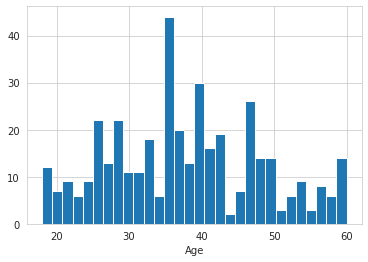

In [7]:
sns.set_style('whitegrid')
dataset['Age'].hist(bins=30)
plt.xlabel('Age')

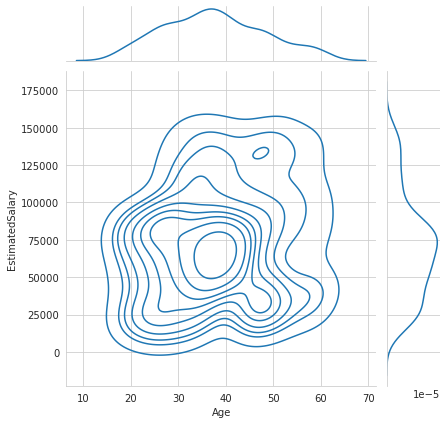

In [8]:
sns.jointplot(x='Age',y='EstimatedSalary',data=dataset,kind='kde')

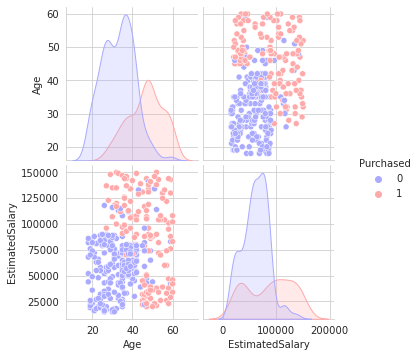

In [9]:
sns.pairplot(dataset,hue='Purchased',palette='bwr')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

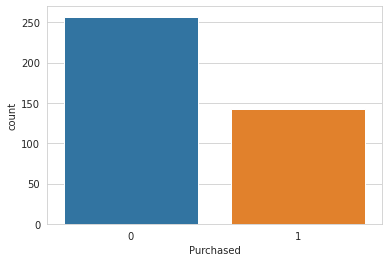

In [10]:
sns.countplot(x='Purchased',data=dataset)

In [11]:
#1.Logistic Regression Approach

In [12]:
#Splitting the dataset into the Training set and Test set¶
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
#Training the Logistic Regression model on the Training set¶
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

In [17]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
  
#Instantiating RandomizedSearchCV object 
log_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
log_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(log_cv.best_params_)) 
print("Best score is {}".format(log_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'penalty': 'l2', 'C': 1000}
Best score is 0.8233333333333335


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81333333        nan        nan        nan 0.82333333        nan
        nan 0.63       0.82333333 0.82333333]
  warnings.warn(


In [18]:
#Hyperparameter tuning with GridSearch CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.67 %
Best Parameters: {'C': 10, 'penalty': 'l2'}


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.63              nan 0.75              nan 0.81333333
        nan 0.82333333        nan 0.82666667        nan 0.82333333
        nan 0.82333333]
  warnings.warn(


In [19]:
classifier_new = LogisticRegression(C=10,random_state = 0)
classifier_new.fit(X_train, y_train)
y_pred_new = classifier_new.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_new)
print(cm)
accuracy_score(y_test, y_pred_new)

[[65  3]
 [ 8 24]]


0.89

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [23]:
#K-Cross Validation #Updated Logistic Regression with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.67 %
Standard Deviation: 9.52 %


In [24]:
#2. KNN Approach

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[64  4]
 [ 3 29]]


0.93

In [27]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(100)
for i in range(1,101):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)

mean_acc

array([0.87, 0.9 , 0.93, 0.92, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93,
       0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93,
       0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93,
       0.93, 0.93, 0.93, 0.93, 0.92, 0.92, 0.92, 0.93, 0.93, 0.93, 0.92,
       0.92, 0.91, 0.92, 0.92, 0.92, 0.92, 0.92, 0.91, 0.91, 0.9 , 0.9 ,
       0.89, 0.89, 0.89, 0.9 , 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89,
       0.89, 0.89, 0.89, 0.88, 0.89, 0.89, 0.89, 0.9 , 0.91, 0.9 , 0.9 ,
       0.9 , 0.9 , 0.88, 0.88, 0.88, 0.88, 0.87, 0.87, 0.87, 0.87, 0.86,
       0.87, 0.86, 0.86, 0.86, 0.87, 0.86, 0.87, 0.86, 0.86, 0.86, 0.86,
       0.84])

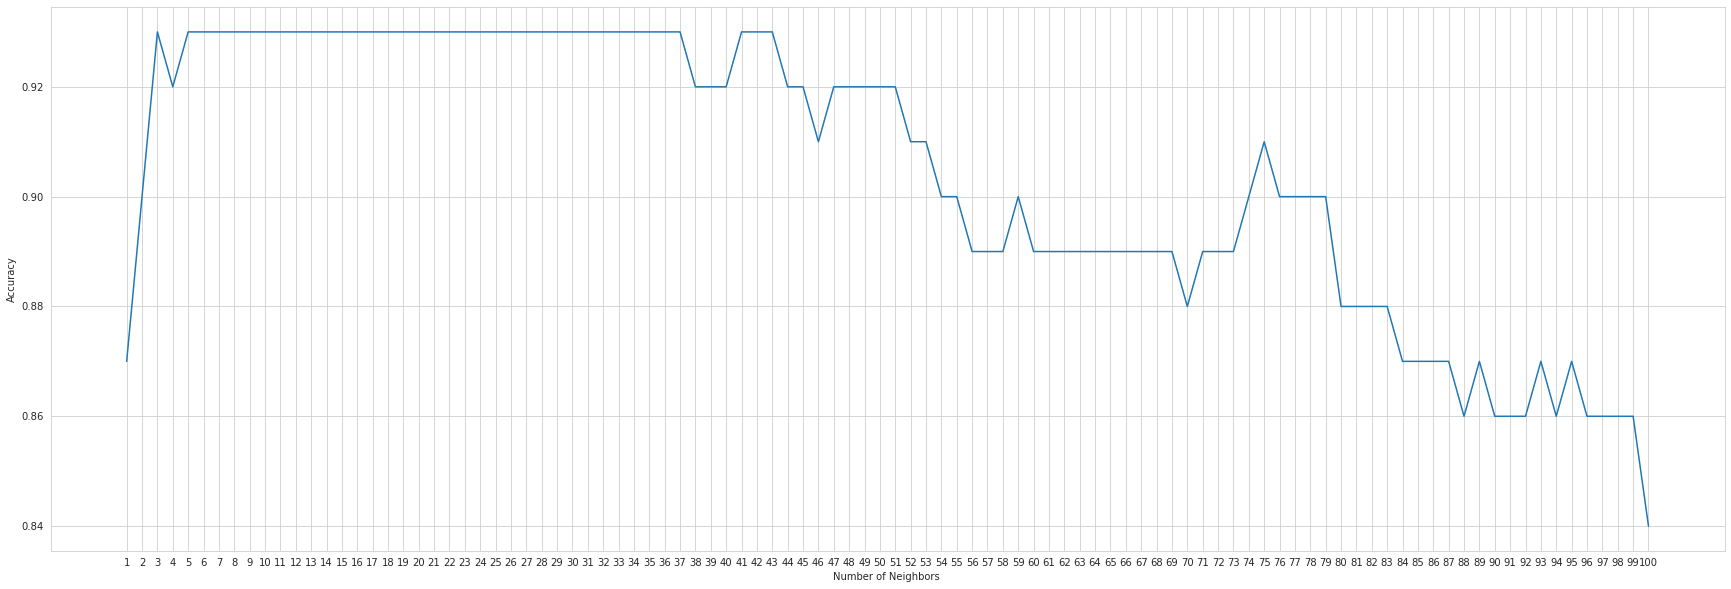

In [28]:
loc = np.arange(1,101,step=1.0)
plt.figure(figsize = (30, 10))
plt.plot(range(1,101), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [29]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
grid_params = {'n_neighbors' : list(range(5,35)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : list(range(1,50)),
               'p' : [1,2]}
  
  
# Instantiating RandomizedSearchCV object 
knn_cv = RandomizedSearchCV(classifier1,grid_params, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
knn_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_)) 

Tuned KNN Parameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'metric': 'euclidean', 'leaf_size': 3}
Best score is 0.9066666666666668


In [30]:
#Hyperparameter tuning with Grid Search CV
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid  
grid_params = {'n_neighbors' : list(range(5,20)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : list(range(1,50)),
               'p' : [1,2]}
  

grid_search_knn = GridSearchCV(estimator = classifier1,
                           param_grid = grid_params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search_knn.fit(X_train, y_train)
best_accuracy_1 = grid_search_knn.best_score_
best_parameters_1 = grid_search_knn.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_1*100))
print("Best Parameters:", best_parameters_1)

Best Accuracy: 91.00 %
Best Parameters: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


In [31]:
classifier1_new = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2,leaf_size=1)
classifier1_new.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=11)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1_new = classifier1_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred1_new)
print(cm)
accuracy_score(y_test, y_pred1_new)

[[64  4]
 [ 3 29]]


0.93

In [33]:
#K-Cross Validation #Updated KNN with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 91.00 %
Standard Deviation: 5.59 %


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1_new))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [35]:
#3. SVM Approach

In [36]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[66  2]
 [ 8 24]]


0.9

In [38]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
  
# Instantiating RandomizedSearchCV object 
tree_cv2 = RandomizedSearchCV(classifier2,param_dist2, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv2.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned SVR Parameters: {}".format(tree_cv2.best_params_)) 
print("Best score is {}".format(tree_cv2.best_score_)) 

Tuned SVR Parameters: {'kernel': 'rbf', 'gamma': 0.7, 'degree': 3, 'C': 1}
Best score is 0.9066666666666666


In [39]:
#Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
grid_search2 = GridSearchCV(estimator = classifier2,
                           param_grid = parameters2,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search2.fit(X_train, y_train)
best_accuracy1 = grid_search2.best_score_
best_parameters2 = grid_search2.best_params_
print("Best r2_score: {:.2f} %".format(best_accuracy1*100))
print("Best Parameters:", best_parameters2)

Best r2_score: 90.67 %
Best Parameters: {'C': 0.5, 'degree': 1, 'gamma': 0.6, 'kernel': 'rbf'}


In [40]:
classifier2_new = SVC(kernel = 'rbf',C=0.50,degree=1,gamma=0.6, random_state = 0)
classifier2_new.fit(X_train, y_train)

SVC(C=0.5, degree=1, gamma=0.6, random_state=0)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2_new = classifier2_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred2_new)
print(cm)
accuracy_score(y_test, y_pred2_new)

[[64  4]
 [ 3 29]]


0.93

In [42]:
#K-Cross Validation #Updated SVC with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier2_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))


Accuracy: 90.67 %
Standard Deviation: 6.11 %


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2_new))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [44]:
#4. Naive Bayes Approach

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB()

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[65  3]
 [ 7 25]]


0.9

In [47]:
#K-Cross Validation #Updated Naive Bayes with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))


Accuracy: 87.67 %
Standard Deviation: 8.95 %


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [50]:
#5.Decision Tree Classification Approach

In [51]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[62  6]
 [ 3 29]]


0.91

In [55]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [2, 6, 8,10,12,14], 
              "min_samples_split": [2,4,10,12,16,20,24],
              "max_features": [2,3,4,5,6],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,90,100],
              "criterion": ["gini", "entropy"]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier4,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_split': 4, 'min_samples_leaf': 10, 'max_leaf_nodes': 80, 'max_features': 2, 'max_depth': 14, 'criterion': 'entropy'}
Best score is 0.8966666666666667


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.89666667 0.89333333        nan        nan        nan
        nan        nan        nan 0.89      ]
  warnings.warn(


In [56]:
#Hyperparameter tuning with Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid1 = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,4,10,12,16,20,24],
              "max_features": [2,3,4,5,6],
              "max_depth": [2,4,6,8,10,12,14],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,90,100]
              }
grid_search = GridSearchCV(estimator = classifier4,
                           param_grid = param_grid1,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy_score4 = grid_search.best_score_
best_parameters4 = grid_search.best_params_
print("Best Accuracy_score: {:.2f} %".format(best_accuracy_score4*100))
print("Best Parameters:", best_parameters4)

Best Accuracy_score: 90.67 %
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'max_leaf_nodes': 10, 'min_samples_leaf': 6, 'min_samples_split': 20}


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.9 0.9 0.9 ... nan nan nan]
  warnings.warn(


In [57]:
classifier4_new = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=4,max_features=2,min_samples_leaf=6,min_samples_split=20,max_leaf_nodes=10)
classifier4_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=2, max_leaf_nodes=10,
                       min_samples_leaf=6, min_samples_split=20,
                       random_state=0)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4_new = classifier4_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred4_new)
print(cm)
accuracy_score(y_test, y_pred4_new)

[[64  4]
 [ 2 30]]


0.94

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4_new))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [60]:
#K-Cross Validation #Updated Decision Tree with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies4 = cross_val_score(estimator = classifier4_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))


Accuracy: 90.67 %
Standard Deviation: 6.29 %


In [61]:
# 6. Random Forest Classification Approach
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)

[[63  5]
 [ 4 28]]


0.91

In [63]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist5 = {"n_estimators": [20,30,50,100],
            "max_features": ['auto', 'sqrt', 'log2'],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 6, 8,10,12]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv5 = RandomizedSearchCV(classifier5,param_dist5, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv5.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(tree_cv5.best_params_)) 
print("Best score is {}".format(tree_cv5.best_score_)) 

Tuned Random Forest Parameters: {'n_estimators': 30, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
Best score is 0.9099999999999999


In [64]:
classifier5_new = RandomForestClassifier(n_estimators = 30, criterion = 'gini', random_state = 0,max_depth=12,min_samples_split=10)
classifier5_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_split=10, n_estimators=30,
                       random_state=0)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5_new = classifier5_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred5_new)
print(cm)
accuracy_score(y_test, y_pred5_new)

[[64  4]
 [ 2 30]]


0.94

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5_new))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [67]:
#K-Cross Validation #Updated Random Forest with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies5 = cross_val_score(estimator = classifier5_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))


Accuracy: 91.00 %
Standard Deviation: 6.33 %


In [68]:
#7. XGBOOST Classification

In [69]:
from xgboost import XGBClassifier
classifier6 = XGBClassifier()
classifier6.fit(X_train, y_train)

[21:14:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = classifier6.predict(X_test)
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[62  6]
 [ 4 28]]


0.9

In [71]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid  
param_dist = {"n_estimators": [10,30,50,100,200],
              "min_child_weight":[1,2,3,4,5,6,7],
              "gamma":[0,0.1,0.2,0.3,0.4,0.5,0.6],
              "max_depth": [3,4,5,6,7,8,9,10,12,15],
              'subsample':[i/10.0 for i in range(6,10)],
              'colsample_bytree':[i/10.0 for i in range(3,10)],
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              "learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]} 
  

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier6,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned XGboost Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

[21:18:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned XGboost Parameters: {'subsample': 0.9, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.7}
Best score is 0.8833333333333334


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [72]:
classifier6_new = XGBClassifier(n_estimators = 50,subsample= 0.7,reg_alpha= 0.01 , random_state = 0,max_depth=5,
                                min_child_weight= 4,learning_rate= 0.1, gamma= 0.6, colsample_bytree= 0.9)
classifier6_new.fit(X_train, y_train)

[21:18:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6_new = classifier6_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred6_new)
print(cm)
accuracy_score(y_test, y_pred6_new)

[[64  4]
 [ 3 29]]


0.93

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6_new))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [75]:
#K-Cross Validation #Updated XGBoost with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies6 = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))


[21:18:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 88.00 %
Standard Deviation: 6.18 %


In [76]:
#### ADABOOST CLASSIFIER

In [77]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 5 27]]


0.91

In [79]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid
param_dist = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20,30,50,100,200],
    'learning_rate': [0.01,0.1,0.5,0.8,1],
    'algorithm': ['SAMME', 'SAMME.R']
             }
  

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Adaboost Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Adaboost Parameters: {'n_estimators': 8, 'learning_rate': 1, 'algorithm': 'SAMME'}
Best score is 0.8699999999999999


In [80]:
tree_cv.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=8)

In [81]:
#K-Cross Validation Updated Adaboost with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 85.67 %
Standard Deviation: 7.16 %


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [83]:
#### Gradient Boosting Classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 5 27]]


0.91

In [86]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {'learning_rate':[1,0.50,0.25,0.15,0.1,0.05,0.01,0.005,0.001],
           'n_estimators':[50,100,250,500,750,1000,1500],
           'max_depth':[2,3,4,5,6,7,8,9,10,12,14,16],
           'min_samples_split':[2,4,8,10,20,40,60,100],
           'min_samples_leaf':[1,3,5,7,9,10,20],
           'max_features':[2,3,4,5,6,7,8,9,10],
           'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95,1]}

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Gradient Boosting Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Gradient Boosting Parameters: {'subsample': 0.6, 'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 2, 'max_depth': 14, 'learning_rate': 0.15}
Best score is 0.8966666666666667


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.89666667        nan        nan
        nan        nan        nan        nan]
  warnings.warn(


In [87]:
#No need to update the paramters since acuracy decreased in hyperparameter tuning

In [88]:
from sklearn.model_selection import cross_val_score
accuracies_new = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_new.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_new.std()*100))

Accuracy: 88.67 %
Standard Deviation: 5.81 %


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [90]:
#### LightGBM (Light Gradient Boosting Machine)


In [91]:
import lightgbm as lgb
  
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier


In [92]:
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 5 27]]


0.89

In [94]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {
'max_depth':[2,3,4,5,6,7,8,10,12,14,16,18,20],
'num_leaves':[10,20,30,40,50,60,70,80],
'learning_rate': [0.01,0.02,0.04,0.05,0.1,0.2,0.5,1],
'n_estimators':[50,100,200,500,1000],
'min_data_in_leaf':[100,200,300,500,800,1000],
'colsample_bytree': [0.5,1.0],
'subsample': [0.5,1.0],
'subsample_freq':[0,1],
'feature_fraction':[0.8,1.0],
'bagging_fraction':[0.8,1.0]

}


# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned LightGBM Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
Tuned LightGBM Parameters: {'subsample_freq': 0, 'subsample': 0.5, 'num_leaves': 30, 'n_estimators': 500, 'min_data_in_leaf': 100, 'max_depth': 5, 'learning_rate': 0.01, 'feature_fraction': 1.0, 'colsample_bytree': 0.5, 'bagging_fraction': 0.8}
Best score is 0.8166666666666668


In [95]:
from sklearn.model_selection import cross_val_score
accuracies_new = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_new.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_new.std()*100))

Accuracy: 90.00 %
Standard Deviation: 6.50 %


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.82      0.84      0.83        32

    accuracy                           0.89       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.89      0.89       100



In [97]:
#8. Catboost Classifier

In [98]:
from catboost import CatBoostClassifier
classifier8 = CatBoostClassifier()
classifier8.fit(X_train, y_train)

Learning rate set to 0.006161
0:	learn: 0.6872926	total: 81.2ms	remaining: 1m 21s
1:	learn: 0.6799471	total: 82.4ms	remaining: 41.1s
2:	learn: 0.6721264	total: 83.5ms	remaining: 27.7s
3:	learn: 0.6652568	total: 84.5ms	remaining: 21s
4:	learn: 0.6586874	total: 85.5ms	remaining: 17s
5:	learn: 0.6522441	total: 86.4ms	remaining: 14.3s
6:	learn: 0.6454735	total: 87.4ms	remaining: 12.4s
7:	learn: 0.6390894	total: 88.4ms	remaining: 11s
8:	learn: 0.6318089	total: 89.2ms	remaining: 9.83s
9:	learn: 0.6250851	total: 90.1ms	remaining: 8.92s
10:	learn: 0.6185944	total: 91ms	remaining: 8.18s
11:	learn: 0.6135007	total: 91.9ms	remaining: 7.57s
12:	learn: 0.6077418	total: 92.8ms	remaining: 7.04s
13:	learn: 0.6017832	total: 93.7ms	remaining: 6.6s
14:	learn: 0.5956528	total: 94.6ms	remaining: 6.21s
15:	learn: 0.5906843	total: 95.5ms	remaining: 5.87s
16:	learn: 0.5861526	total: 96.4ms	remaining: 5.57s
17:	learn: 0.5807810	total: 97.2ms	remaining: 5.3s
18:	learn: 0.5758800	total: 98.2ms	remaining: 5.07s
1

251:	learn: 0.2314698	total: 324ms	remaining: 961ms
252:	learn: 0.2310340	total: 325ms	remaining: 959ms
253:	learn: 0.2307128	total: 326ms	remaining: 957ms
254:	learn: 0.2304071	total: 327ms	remaining: 955ms
255:	learn: 0.2301716	total: 328ms	remaining: 954ms
256:	learn: 0.2298221	total: 329ms	remaining: 952ms
257:	learn: 0.2295917	total: 330ms	remaining: 949ms
258:	learn: 0.2292720	total: 331ms	remaining: 947ms
259:	learn: 0.2289744	total: 332ms	remaining: 945ms
260:	learn: 0.2286661	total: 333ms	remaining: 943ms
261:	learn: 0.2284173	total: 334ms	remaining: 941ms
262:	learn: 0.2280641	total: 335ms	remaining: 939ms
263:	learn: 0.2277529	total: 336ms	remaining: 937ms
264:	learn: 0.2274552	total: 337ms	remaining: 935ms
265:	learn: 0.2271145	total: 338ms	remaining: 933ms
266:	learn: 0.2269015	total: 339ms	remaining: 931ms
267:	learn: 0.2267487	total: 340ms	remaining: 929ms
268:	learn: 0.2264120	total: 341ms	remaining: 927ms
269:	learn: 0.2262997	total: 342ms	remaining: 925ms
270:	learn: 

422:	learn: 0.1987447	total: 504ms	remaining: 688ms
423:	learn: 0.1985958	total: 506ms	remaining: 687ms
424:	learn: 0.1985159	total: 507ms	remaining: 686ms
425:	learn: 0.1983704	total: 508ms	remaining: 685ms
426:	learn: 0.1981991	total: 509ms	remaining: 684ms
427:	learn: 0.1980944	total: 511ms	remaining: 682ms
428:	learn: 0.1979434	total: 512ms	remaining: 681ms
429:	learn: 0.1978311	total: 513ms	remaining: 680ms
430:	learn: 0.1977270	total: 514ms	remaining: 679ms
431:	learn: 0.1976361	total: 515ms	remaining: 677ms
432:	learn: 0.1975327	total: 516ms	remaining: 676ms
433:	learn: 0.1974591	total: 517ms	remaining: 675ms
434:	learn: 0.1973172	total: 518ms	remaining: 673ms
435:	learn: 0.1972015	total: 519ms	remaining: 672ms
436:	learn: 0.1971079	total: 521ms	remaining: 671ms
437:	learn: 0.1970437	total: 522ms	remaining: 669ms
438:	learn: 0.1969290	total: 523ms	remaining: 668ms
439:	learn: 0.1968175	total: 524ms	remaining: 667ms
440:	learn: 0.1966506	total: 525ms	remaining: 665ms
441:	learn: 

617:	learn: 0.1780687	total: 687ms	remaining: 425ms
618:	learn: 0.1779972	total: 688ms	remaining: 424ms
619:	learn: 0.1778499	total: 689ms	remaining: 423ms
620:	learn: 0.1777967	total: 691ms	remaining: 422ms
621:	learn: 0.1777500	total: 692ms	remaining: 420ms
622:	learn: 0.1776599	total: 693ms	remaining: 419ms
623:	learn: 0.1775497	total: 694ms	remaining: 418ms
624:	learn: 0.1774638	total: 695ms	remaining: 417ms
625:	learn: 0.1773618	total: 696ms	remaining: 416ms
626:	learn: 0.1772270	total: 697ms	remaining: 415ms
627:	learn: 0.1771645	total: 698ms	remaining: 414ms
628:	learn: 0.1770156	total: 699ms	remaining: 412ms
629:	learn: 0.1769762	total: 700ms	remaining: 411ms
630:	learn: 0.1768570	total: 701ms	remaining: 410ms
631:	learn: 0.1768022	total: 702ms	remaining: 409ms
632:	learn: 0.1767268	total: 703ms	remaining: 408ms
633:	learn: 0.1766513	total: 704ms	remaining: 407ms
634:	learn: 0.1765732	total: 706ms	remaining: 406ms
635:	learn: 0.1765133	total: 707ms	remaining: 404ms
636:	learn: 

805:	learn: 0.1626715	total: 869ms	remaining: 209ms
806:	learn: 0.1626379	total: 870ms	remaining: 208ms
807:	learn: 0.1625654	total: 872ms	remaining: 207ms
808:	learn: 0.1624853	total: 873ms	remaining: 206ms
809:	learn: 0.1623831	total: 877ms	remaining: 206ms
810:	learn: 0.1623328	total: 878ms	remaining: 205ms
811:	learn: 0.1622379	total: 880ms	remaining: 204ms
812:	learn: 0.1622024	total: 880ms	remaining: 203ms
813:	learn: 0.1620733	total: 882ms	remaining: 202ms
814:	learn: 0.1620011	total: 884ms	remaining: 201ms
815:	learn: 0.1619209	total: 887ms	remaining: 200ms
816:	learn: 0.1618814	total: 888ms	remaining: 199ms
817:	learn: 0.1618026	total: 889ms	remaining: 198ms
818:	learn: 0.1617625	total: 890ms	remaining: 197ms
819:	learn: 0.1617309	total: 891ms	remaining: 196ms
820:	learn: 0.1616726	total: 892ms	remaining: 195ms
821:	learn: 0.1616060	total: 893ms	remaining: 193ms
822:	learn: 0.1615094	total: 894ms	remaining: 192ms
823:	learn: 0.1614203	total: 896ms	remaining: 191ms
824:	learn: 

987:	learn: 0.1494950	total: 1.05s	remaining: 12.8ms
988:	learn: 0.1493843	total: 1.05s	remaining: 11.7ms
989:	learn: 0.1493532	total: 1.05s	remaining: 10.6ms
990:	learn: 0.1492955	total: 1.05s	remaining: 9.57ms
991:	learn: 0.1492569	total: 1.05s	remaining: 8.51ms
992:	learn: 0.1491523	total: 1.05s	remaining: 7.44ms
993:	learn: 0.1490616	total: 1.06s	remaining: 6.38ms
994:	learn: 0.1490077	total: 1.06s	remaining: 5.32ms
995:	learn: 0.1489262	total: 1.06s	remaining: 4.25ms
996:	learn: 0.1488615	total: 1.06s	remaining: 3.19ms
997:	learn: 0.1487740	total: 1.06s	remaining: 2.13ms
998:	learn: 0.1486640	total: 1.06s	remaining: 1.06ms
999:	learn: 0.1485701	total: 1.06s	remaining: 0us


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred8 = classifier8.predict(X_test)
cm = confusion_matrix(y_test, y_pred8)
print(cm)
accuracy_score(y_test, y_pred8)

[[64  4]
 [ 3 29]]


0.93

In [100]:
#K-Cross Validation #Updated XGBOOST Classifier with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies8 = cross_val_score(estimator = classifier8, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies8.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies8.std()*100))


Learning rate set to 0.00589
0:	learn: 0.6872581	total: 589us	remaining: 589ms
1:	learn: 0.6807292	total: 1.59ms	remaining: 792ms
2:	learn: 0.6729253	total: 2.5ms	remaining: 833ms
3:	learn: 0.6660996	total: 3.46ms	remaining: 863ms
4:	learn: 0.6591204	total: 4.36ms	remaining: 868ms
5:	learn: 0.6522726	total: 5.29ms	remaining: 876ms
6:	learn: 0.6459264	total: 6.22ms	remaining: 883ms
7:	learn: 0.6393302	total: 7.16ms	remaining: 888ms
8:	learn: 0.6318176	total: 8.04ms	remaining: 885ms
9:	learn: 0.6255584	total: 9.02ms	remaining: 893ms
10:	learn: 0.6195272	total: 10.2ms	remaining: 915ms
11:	learn: 0.6132918	total: 11.1ms	remaining: 915ms
12:	learn: 0.6076058	total: 12ms	remaining: 915ms
13:	learn: 0.6016556	total: 12.9ms	remaining: 911ms
14:	learn: 0.5960001	total: 13.8ms	remaining: 908ms
15:	learn: 0.5908449	total: 14.7ms	remaining: 905ms
16:	learn: 0.5854098	total: 15.7ms	remaining: 905ms
17:	learn: 0.5803127	total: 16.2ms	remaining: 885ms
18:	learn: 0.5746510	total: 17.1ms	remaining: 883

185:	learn: 0.2489958	total: 183ms	remaining: 800ms
186:	learn: 0.2484467	total: 184ms	remaining: 801ms
187:	learn: 0.2477467	total: 185ms	remaining: 801ms
188:	learn: 0.2471092	total: 186ms	remaining: 800ms
189:	learn: 0.2466623	total: 187ms	remaining: 799ms
190:	learn: 0.2461920	total: 189ms	remaining: 799ms
191:	learn: 0.2456692	total: 190ms	remaining: 798ms
192:	learn: 0.2453317	total: 191ms	remaining: 797ms
193:	learn: 0.2448580	total: 192ms	remaining: 797ms
194:	learn: 0.2442319	total: 193ms	remaining: 796ms
195:	learn: 0.2436253	total: 194ms	remaining: 796ms
196:	learn: 0.2432150	total: 195ms	remaining: 795ms
197:	learn: 0.2426848	total: 196ms	remaining: 794ms
198:	learn: 0.2420007	total: 197ms	remaining: 793ms
199:	learn: 0.2415145	total: 198ms	remaining: 792ms
200:	learn: 0.2412245	total: 199ms	remaining: 790ms
201:	learn: 0.2407583	total: 200ms	remaining: 789ms
202:	learn: 0.2401218	total: 201ms	remaining: 788ms
203:	learn: 0.2398126	total: 201ms	remaining: 786ms
204:	learn: 

349:	learn: 0.1955393	total: 365ms	remaining: 677ms
350:	learn: 0.1953215	total: 366ms	remaining: 676ms
351:	learn: 0.1950813	total: 367ms	remaining: 675ms
352:	learn: 0.1948215	total: 368ms	remaining: 674ms
353:	learn: 0.1944604	total: 369ms	remaining: 673ms
354:	learn: 0.1942577	total: 370ms	remaining: 672ms
355:	learn: 0.1940522	total: 371ms	remaining: 671ms
356:	learn: 0.1938349	total: 372ms	remaining: 670ms
357:	learn: 0.1936927	total: 373ms	remaining: 669ms
358:	learn: 0.1934842	total: 374ms	remaining: 668ms
359:	learn: 0.1932788	total: 375ms	remaining: 667ms
360:	learn: 0.1931097	total: 376ms	remaining: 666ms
361:	learn: 0.1928262	total: 377ms	remaining: 664ms
362:	learn: 0.1926094	total: 378ms	remaining: 663ms
363:	learn: 0.1924776	total: 379ms	remaining: 662ms
364:	learn: 0.1922750	total: 380ms	remaining: 661ms
365:	learn: 0.1920444	total: 381ms	remaining: 660ms
366:	learn: 0.1919251	total: 382ms	remaining: 659ms
367:	learn: 0.1917036	total: 383ms	remaining: 658ms
368:	learn: 

550:	learn: 0.1673683	total: 547ms	remaining: 446ms
551:	learn: 0.1672788	total: 548ms	remaining: 445ms
552:	learn: 0.1672227	total: 549ms	remaining: 444ms
553:	learn: 0.1671239	total: 551ms	remaining: 443ms
554:	learn: 0.1669751	total: 552ms	remaining: 442ms
555:	learn: 0.1668502	total: 553ms	remaining: 441ms
556:	learn: 0.1667095	total: 554ms	remaining: 440ms
557:	learn: 0.1666376	total: 555ms	remaining: 439ms
558:	learn: 0.1664993	total: 556ms	remaining: 439ms
559:	learn: 0.1664067	total: 557ms	remaining: 438ms
560:	learn: 0.1663347	total: 558ms	remaining: 437ms
561:	learn: 0.1662721	total: 559ms	remaining: 436ms
562:	learn: 0.1661690	total: 560ms	remaining: 435ms
563:	learn: 0.1660413	total: 561ms	remaining: 434ms
564:	learn: 0.1659715	total: 562ms	remaining: 433ms
565:	learn: 0.1658832	total: 563ms	remaining: 432ms
566:	learn: 0.1658129	total: 564ms	remaining: 431ms
567:	learn: 0.1656895	total: 565ms	remaining: 430ms
568:	learn: 0.1656140	total: 566ms	remaining: 429ms
569:	learn: 

746:	learn: 0.1511200	total: 731ms	remaining: 248ms
747:	learn: 0.1510655	total: 732ms	remaining: 247ms
748:	learn: 0.1509998	total: 733ms	remaining: 246ms
749:	learn: 0.1508788	total: 734ms	remaining: 245ms
750:	learn: 0.1507752	total: 735ms	remaining: 244ms
751:	learn: 0.1506771	total: 736ms	remaining: 243ms
752:	learn: 0.1505887	total: 737ms	remaining: 242ms
753:	learn: 0.1505060	total: 738ms	remaining: 241ms
754:	learn: 0.1504098	total: 740ms	remaining: 240ms
755:	learn: 0.1503515	total: 741ms	remaining: 239ms
756:	learn: 0.1502961	total: 742ms	remaining: 238ms
757:	learn: 0.1502304	total: 743ms	remaining: 237ms
758:	learn: 0.1501771	total: 744ms	remaining: 236ms
759:	learn: 0.1500803	total: 745ms	remaining: 235ms
760:	learn: 0.1499893	total: 746ms	remaining: 234ms
761:	learn: 0.1499082	total: 747ms	remaining: 233ms
762:	learn: 0.1498179	total: 748ms	remaining: 232ms
763:	learn: 0.1497757	total: 749ms	remaining: 231ms
764:	learn: 0.1497157	total: 750ms	remaining: 230ms
765:	learn: 

932:	learn: 0.1371623	total: 913ms	remaining: 65.5ms
933:	learn: 0.1371204	total: 914ms	remaining: 64.6ms
934:	learn: 0.1370701	total: 915ms	remaining: 63.6ms
935:	learn: 0.1370172	total: 916ms	remaining: 62.6ms
936:	learn: 0.1369665	total: 917ms	remaining: 61.6ms
937:	learn: 0.1369332	total: 918ms	remaining: 60.7ms
938:	learn: 0.1368214	total: 919ms	remaining: 59.7ms
939:	learn: 0.1367440	total: 920ms	remaining: 58.7ms
940:	learn: 0.1366843	total: 920ms	remaining: 57.7ms
941:	learn: 0.1366069	total: 921ms	remaining: 56.7ms
942:	learn: 0.1365566	total: 922ms	remaining: 55.8ms
943:	learn: 0.1365180	total: 923ms	remaining: 54.8ms
944:	learn: 0.1364664	total: 924ms	remaining: 53.8ms
945:	learn: 0.1364263	total: 925ms	remaining: 52.8ms
946:	learn: 0.1363750	total: 926ms	remaining: 51.8ms
947:	learn: 0.1363357	total: 927ms	remaining: 50.9ms
948:	learn: 0.1362931	total: 928ms	remaining: 49.9ms
949:	learn: 0.1362290	total: 929ms	remaining: 48.9ms
950:	learn: 0.1361648	total: 930ms	remaining: 

210:	learn: 0.2540938	total: 183ms	remaining: 683ms
211:	learn: 0.2537189	total: 184ms	remaining: 683ms
212:	learn: 0.2531959	total: 185ms	remaining: 683ms
213:	learn: 0.2526266	total: 186ms	remaining: 683ms
214:	learn: 0.2521597	total: 187ms	remaining: 683ms
215:	learn: 0.2517571	total: 188ms	remaining: 683ms
216:	learn: 0.2512801	total: 189ms	remaining: 682ms
217:	learn: 0.2508695	total: 190ms	remaining: 682ms
218:	learn: 0.2504237	total: 191ms	remaining: 682ms
219:	learn: 0.2498660	total: 192ms	remaining: 681ms
220:	learn: 0.2494409	total: 193ms	remaining: 681ms
221:	learn: 0.2489271	total: 194ms	remaining: 681ms
222:	learn: 0.2485177	total: 195ms	remaining: 680ms
223:	learn: 0.2481055	total: 196ms	remaining: 680ms
224:	learn: 0.2478143	total: 197ms	remaining: 679ms
225:	learn: 0.2474503	total: 198ms	remaining: 679ms
226:	learn: 0.2470073	total: 199ms	remaining: 678ms
227:	learn: 0.2467180	total: 200ms	remaining: 678ms
228:	learn: 0.2463608	total: 201ms	remaining: 678ms
229:	learn: 

412:	learn: 0.2022210	total: 365ms	remaining: 519ms
413:	learn: 0.2021732	total: 367ms	remaining: 519ms
414:	learn: 0.2019777	total: 368ms	remaining: 518ms
415:	learn: 0.2018007	total: 368ms	remaining: 517ms
416:	learn: 0.2017079	total: 370ms	remaining: 517ms
417:	learn: 0.2016068	total: 371ms	remaining: 516ms
418:	learn: 0.2014217	total: 372ms	remaining: 515ms
419:	learn: 0.2012868	total: 372ms	remaining: 514ms
420:	learn: 0.2011427	total: 373ms	remaining: 513ms
421:	learn: 0.2010886	total: 374ms	remaining: 512ms
422:	learn: 0.2009554	total: 375ms	remaining: 512ms
423:	learn: 0.2008505	total: 376ms	remaining: 511ms
424:	learn: 0.2006467	total: 377ms	remaining: 510ms
425:	learn: 0.2004986	total: 378ms	remaining: 509ms
426:	learn: 0.2003755	total: 379ms	remaining: 508ms
427:	learn: 0.2002725	total: 380ms	remaining: 507ms
428:	learn: 0.2001692	total: 381ms	remaining: 507ms
429:	learn: 0.2001122	total: 381ms	remaining: 505ms
430:	learn: 0.1999591	total: 382ms	remaining: 505ms
431:	learn: 

611:	learn: 0.1781472	total: 549ms	remaining: 348ms
612:	learn: 0.1780274	total: 550ms	remaining: 347ms
613:	learn: 0.1779252	total: 551ms	remaining: 346ms
614:	learn: 0.1778450	total: 552ms	remaining: 346ms
615:	learn: 0.1777739	total: 553ms	remaining: 345ms
616:	learn: 0.1775818	total: 554ms	remaining: 344ms
617:	learn: 0.1775215	total: 555ms	remaining: 343ms
618:	learn: 0.1774427	total: 557ms	remaining: 343ms
619:	learn: 0.1774147	total: 558ms	remaining: 342ms
620:	learn: 0.1771715	total: 559ms	remaining: 341ms
621:	learn: 0.1770168	total: 560ms	remaining: 340ms
622:	learn: 0.1768991	total: 561ms	remaining: 339ms
623:	learn: 0.1768073	total: 562ms	remaining: 339ms
624:	learn: 0.1766398	total: 563ms	remaining: 338ms
625:	learn: 0.1765444	total: 564ms	remaining: 337ms
626:	learn: 0.1764807	total: 566ms	remaining: 336ms
627:	learn: 0.1763124	total: 567ms	remaining: 336ms
628:	learn: 0.1762098	total: 568ms	remaining: 335ms
629:	learn: 0.1761408	total: 569ms	remaining: 334ms
630:	learn: 

813:	learn: 0.1599627	total: 732ms	remaining: 167ms
814:	learn: 0.1598319	total: 733ms	remaining: 166ms
815:	learn: 0.1596906	total: 734ms	remaining: 166ms
816:	learn: 0.1595084	total: 735ms	remaining: 165ms
817:	learn: 0.1593767	total: 736ms	remaining: 164ms
818:	learn: 0.1592906	total: 737ms	remaining: 163ms
819:	learn: 0.1591844	total: 738ms	remaining: 162ms
820:	learn: 0.1591073	total: 739ms	remaining: 161ms
821:	learn: 0.1590603	total: 740ms	remaining: 160ms
822:	learn: 0.1589176	total: 741ms	remaining: 159ms
823:	learn: 0.1587987	total: 742ms	remaining: 158ms
824:	learn: 0.1586922	total: 743ms	remaining: 158ms
825:	learn: 0.1586532	total: 744ms	remaining: 157ms
826:	learn: 0.1585525	total: 745ms	remaining: 156ms
827:	learn: 0.1585002	total: 746ms	remaining: 155ms
828:	learn: 0.1584484	total: 747ms	remaining: 154ms
829:	learn: 0.1583881	total: 748ms	remaining: 153ms
830:	learn: 0.1583584	total: 749ms	remaining: 152ms
831:	learn: 0.1582322	total: 750ms	remaining: 151ms
832:	learn: 

Learning rate set to 0.00589
0:	learn: 0.6857690	total: 571us	remaining: 571ms
1:	learn: 0.6784028	total: 1.56ms	remaining: 781ms
2:	learn: 0.6701641	total: 2.44ms	remaining: 810ms
3:	learn: 0.6635667	total: 3.4ms	remaining: 847ms
4:	learn: 0.6563213	total: 4.33ms	remaining: 861ms
5:	learn: 0.6491074	total: 5.25ms	remaining: 870ms
6:	learn: 0.6436189	total: 6.19ms	remaining: 878ms
7:	learn: 0.6366349	total: 7.07ms	remaining: 876ms
8:	learn: 0.6288101	total: 8ms	remaining: 880ms
9:	learn: 0.6215802	total: 9.06ms	remaining: 897ms
10:	learn: 0.6153618	total: 10.4ms	remaining: 931ms
11:	learn: 0.6088547	total: 11.3ms	remaining: 928ms
12:	learn: 0.6024086	total: 12.2ms	remaining: 924ms
13:	learn: 0.5959658	total: 13.1ms	remaining: 919ms
14:	learn: 0.5904551	total: 14ms	remaining: 921ms
15:	learn: 0.5857183	total: 14.9ms	remaining: 915ms
16:	learn: 0.5793249	total: 15.8ms	remaining: 916ms
17:	learn: 0.5738365	total: 16.4ms	remaining: 895ms
18:	learn: 0.5678071	total: 17.3ms	remaining: 893ms


198:	learn: 0.2253373	total: 184ms	remaining: 742ms
199:	learn: 0.2248925	total: 186ms	remaining: 742ms
200:	learn: 0.2244761	total: 187ms	remaining: 743ms
201:	learn: 0.2240040	total: 188ms	remaining: 742ms
202:	learn: 0.2235695	total: 189ms	remaining: 741ms
203:	learn: 0.2230648	total: 190ms	remaining: 740ms
204:	learn: 0.2226890	total: 191ms	remaining: 739ms
205:	learn: 0.2220393	total: 192ms	remaining: 738ms
206:	learn: 0.2213503	total: 193ms	remaining: 738ms
207:	learn: 0.2210006	total: 193ms	remaining: 737ms
208:	learn: 0.2203907	total: 194ms	remaining: 736ms
209:	learn: 0.2199444	total: 195ms	remaining: 735ms
210:	learn: 0.2195049	total: 196ms	remaining: 735ms
211:	learn: 0.2190410	total: 198ms	remaining: 734ms
212:	learn: 0.2186784	total: 198ms	remaining: 733ms
213:	learn: 0.2182799	total: 199ms	remaining: 732ms
214:	learn: 0.2179153	total: 200ms	remaining: 731ms
215:	learn: 0.2173326	total: 202ms	remaining: 732ms
216:	learn: 0.2170827	total: 203ms	remaining: 731ms
217:	learn: 

401:	learn: 0.1732939	total: 367ms	remaining: 546ms
402:	learn: 0.1730997	total: 368ms	remaining: 545ms
403:	learn: 0.1730365	total: 369ms	remaining: 544ms
404:	learn: 0.1728460	total: 370ms	remaining: 544ms
405:	learn: 0.1727359	total: 371ms	remaining: 543ms
406:	learn: 0.1726141	total: 372ms	remaining: 542ms
407:	learn: 0.1724093	total: 373ms	remaining: 541ms
408:	learn: 0.1721822	total: 374ms	remaining: 540ms
409:	learn: 0.1719291	total: 375ms	remaining: 539ms
410:	learn: 0.1716506	total: 376ms	remaining: 539ms
411:	learn: 0.1715291	total: 377ms	remaining: 538ms
412:	learn: 0.1714446	total: 378ms	remaining: 537ms
413:	learn: 0.1713254	total: 379ms	remaining: 536ms
414:	learn: 0.1711225	total: 379ms	remaining: 535ms
415:	learn: 0.1710000	total: 380ms	remaining: 534ms
416:	learn: 0.1708433	total: 381ms	remaining: 533ms
417:	learn: 0.1707646	total: 382ms	remaining: 532ms
418:	learn: 0.1706740	total: 383ms	remaining: 532ms
419:	learn: 0.1706023	total: 384ms	remaining: 531ms
420:	learn: 

607:	learn: 0.1503867	total: 549ms	remaining: 354ms
608:	learn: 0.1503519	total: 551ms	remaining: 354ms
609:	learn: 0.1502305	total: 552ms	remaining: 353ms
610:	learn: 0.1502048	total: 553ms	remaining: 352ms
611:	learn: 0.1501006	total: 554ms	remaining: 352ms
612:	learn: 0.1499850	total: 555ms	remaining: 351ms
613:	learn: 0.1498768	total: 556ms	remaining: 350ms
614:	learn: 0.1498565	total: 557ms	remaining: 349ms
615:	learn: 0.1497275	total: 558ms	remaining: 348ms
616:	learn: 0.1496706	total: 559ms	remaining: 347ms
617:	learn: 0.1496179	total: 560ms	remaining: 346ms
618:	learn: 0.1494973	total: 561ms	remaining: 345ms
619:	learn: 0.1494508	total: 562ms	remaining: 344ms
620:	learn: 0.1493760	total: 563ms	remaining: 343ms
621:	learn: 0.1493408	total: 564ms	remaining: 343ms
622:	learn: 0.1492509	total: 565ms	remaining: 342ms
623:	learn: 0.1491488	total: 566ms	remaining: 341ms
624:	learn: 0.1491002	total: 567ms	remaining: 340ms
625:	learn: 0.1490341	total: 568ms	remaining: 339ms
626:	learn: 

801:	learn: 0.1338484	total: 731ms	remaining: 180ms
802:	learn: 0.1337780	total: 732ms	remaining: 180ms
803:	learn: 0.1337227	total: 733ms	remaining: 179ms
804:	learn: 0.1336039	total: 734ms	remaining: 178ms
805:	learn: 0.1335387	total: 735ms	remaining: 177ms
806:	learn: 0.1334504	total: 736ms	remaining: 176ms
807:	learn: 0.1334105	total: 737ms	remaining: 175ms
808:	learn: 0.1333140	total: 738ms	remaining: 174ms
809:	learn: 0.1331948	total: 739ms	remaining: 173ms
810:	learn: 0.1331063	total: 740ms	remaining: 172ms
811:	learn: 0.1330635	total: 741ms	remaining: 172ms
812:	learn: 0.1329922	total: 742ms	remaining: 171ms
813:	learn: 0.1329181	total: 743ms	remaining: 170ms
814:	learn: 0.1328756	total: 744ms	remaining: 169ms
815:	learn: 0.1327917	total: 745ms	remaining: 168ms
816:	learn: 0.1326304	total: 746ms	remaining: 167ms
817:	learn: 0.1325277	total: 747ms	remaining: 166ms
818:	learn: 0.1324637	total: 748ms	remaining: 165ms
819:	learn: 0.1323595	total: 749ms	remaining: 164ms
820:	learn: 

Learning rate set to 0.00589
0:	learn: 0.6878576	total: 564us	remaining: 564ms
1:	learn: 0.6811177	total: 1.48ms	remaining: 741ms
2:	learn: 0.6739344	total: 2.39ms	remaining: 795ms
3:	learn: 0.6673299	total: 3.3ms	remaining: 821ms
4:	learn: 0.6612069	total: 4.16ms	remaining: 828ms
5:	learn: 0.6563146	total: 4.98ms	remaining: 825ms
6:	learn: 0.6510090	total: 5.9ms	remaining: 837ms
7:	learn: 0.6450969	total: 6.82ms	remaining: 845ms
8:	learn: 0.6384069	total: 7.69ms	remaining: 847ms
9:	learn: 0.6320671	total: 8.52ms	remaining: 844ms
10:	learn: 0.6267875	total: 9.44ms	remaining: 849ms
11:	learn: 0.6211972	total: 10.3ms	remaining: 852ms
12:	learn: 0.6157077	total: 11.2ms	remaining: 853ms
13:	learn: 0.6100927	total: 12.1ms	remaining: 849ms
14:	learn: 0.6042898	total: 12.9ms	remaining: 850ms
15:	learn: 0.5998626	total: 13.8ms	remaining: 847ms
16:	learn: 0.5955857	total: 14.4ms	remaining: 835ms
17:	learn: 0.5902397	total: 15.3ms	remaining: 833ms
18:	learn: 0.5849659	total: 16.1ms	remaining: 83

207:	learn: 0.2588117	total: 183ms	remaining: 698ms
208:	learn: 0.2581989	total: 185ms	remaining: 699ms
209:	learn: 0.2578089	total: 186ms	remaining: 698ms
210:	learn: 0.2576578	total: 186ms	remaining: 697ms
211:	learn: 0.2571502	total: 188ms	remaining: 698ms
212:	learn: 0.2565495	total: 189ms	remaining: 698ms
213:	learn: 0.2563292	total: 190ms	remaining: 697ms
214:	learn: 0.2559021	total: 191ms	remaining: 696ms
215:	learn: 0.2554921	total: 192ms	remaining: 695ms
216:	learn: 0.2550454	total: 193ms	remaining: 695ms
217:	learn: 0.2545752	total: 193ms	remaining: 694ms
218:	learn: 0.2541334	total: 194ms	remaining: 693ms
219:	learn: 0.2540362	total: 195ms	remaining: 691ms
220:	learn: 0.2536016	total: 196ms	remaining: 690ms
221:	learn: 0.2530278	total: 197ms	remaining: 689ms
222:	learn: 0.2525673	total: 198ms	remaining: 688ms
223:	learn: 0.2520518	total: 199ms	remaining: 688ms
224:	learn: 0.2515856	total: 200ms	remaining: 687ms
225:	learn: 0.2512547	total: 201ms	remaining: 687ms
226:	learn: 

412:	learn: 0.2063388	total: 367ms	remaining: 521ms
413:	learn: 0.2062126	total: 368ms	remaining: 521ms
414:	learn: 0.2061334	total: 369ms	remaining: 520ms
415:	learn: 0.2060283	total: 370ms	remaining: 519ms
416:	learn: 0.2058929	total: 371ms	remaining: 519ms
417:	learn: 0.2057964	total: 372ms	remaining: 518ms
418:	learn: 0.2056897	total: 373ms	remaining: 517ms
419:	learn: 0.2056153	total: 374ms	remaining: 517ms
420:	learn: 0.2054874	total: 375ms	remaining: 516ms
421:	learn: 0.2053041	total: 376ms	remaining: 515ms
422:	learn: 0.2051874	total: 377ms	remaining: 515ms
423:	learn: 0.2050779	total: 378ms	remaining: 514ms
424:	learn: 0.2049927	total: 379ms	remaining: 513ms
425:	learn: 0.2048458	total: 380ms	remaining: 512ms
426:	learn: 0.2048072	total: 381ms	remaining: 512ms
427:	learn: 0.2046563	total: 382ms	remaining: 511ms
428:	learn: 0.2045147	total: 383ms	remaining: 510ms
429:	learn: 0.2043536	total: 384ms	remaining: 510ms
430:	learn: 0.2042865	total: 385ms	remaining: 508ms
431:	learn: 

615:	learn: 0.1829386	total: 549ms	remaining: 342ms
616:	learn: 0.1828689	total: 550ms	remaining: 342ms
617:	learn: 0.1827427	total: 551ms	remaining: 341ms
618:	learn: 0.1826449	total: 552ms	remaining: 340ms
619:	learn: 0.1824957	total: 553ms	remaining: 339ms
620:	learn: 0.1824446	total: 554ms	remaining: 338ms
621:	learn: 0.1823363	total: 555ms	remaining: 337ms
622:	learn: 0.1822598	total: 556ms	remaining: 337ms
623:	learn: 0.1820539	total: 557ms	remaining: 336ms
624:	learn: 0.1819748	total: 558ms	remaining: 335ms
625:	learn: 0.1818967	total: 559ms	remaining: 334ms
626:	learn: 0.1818410	total: 560ms	remaining: 333ms
627:	learn: 0.1817966	total: 561ms	remaining: 332ms
628:	learn: 0.1817328	total: 562ms	remaining: 331ms
629:	learn: 0.1816608	total: 563ms	remaining: 331ms
630:	learn: 0.1816068	total: 564ms	remaining: 330ms
631:	learn: 0.1815341	total: 565ms	remaining: 329ms
632:	learn: 0.1814439	total: 566ms	remaining: 328ms
633:	learn: 0.1813890	total: 567ms	remaining: 327ms
634:	learn: 

812:	learn: 0.1657736	total: 730ms	remaining: 168ms
813:	learn: 0.1657205	total: 731ms	remaining: 167ms
814:	learn: 0.1656945	total: 732ms	remaining: 166ms
815:	learn: 0.1656261	total: 733ms	remaining: 165ms
816:	learn: 0.1655299	total: 734ms	remaining: 165ms
817:	learn: 0.1654664	total: 736ms	remaining: 164ms
818:	learn: 0.1653754	total: 737ms	remaining: 163ms
819:	learn: 0.1652489	total: 738ms	remaining: 162ms
820:	learn: 0.1650340	total: 739ms	remaining: 161ms
821:	learn: 0.1649737	total: 739ms	remaining: 160ms
822:	learn: 0.1649305	total: 740ms	remaining: 159ms
823:	learn: 0.1648624	total: 741ms	remaining: 158ms
824:	learn: 0.1648061	total: 742ms	remaining: 157ms
825:	learn: 0.1647279	total: 743ms	remaining: 157ms
826:	learn: 0.1646920	total: 744ms	remaining: 156ms
827:	learn: 0.1646279	total: 745ms	remaining: 155ms
828:	learn: 0.1645684	total: 746ms	remaining: 154ms
829:	learn: 0.1644791	total: 747ms	remaining: 153ms
830:	learn: 0.1643755	total: 748ms	remaining: 152ms
831:	learn: 

Learning rate set to 0.00589
0:	learn: 0.6878831	total: 500us	remaining: 500ms
1:	learn: 0.6806500	total: 1.54ms	remaining: 766ms
2:	learn: 0.6731995	total: 2.49ms	remaining: 828ms
3:	learn: 0.6661804	total: 3.53ms	remaining: 879ms
4:	learn: 0.6600640	total: 4.49ms	remaining: 894ms
5:	learn: 0.6539063	total: 5.37ms	remaining: 889ms
6:	learn: 0.6476767	total: 6.26ms	remaining: 888ms
7:	learn: 0.6411133	total: 7.09ms	remaining: 879ms
8:	learn: 0.6335964	total: 8.01ms	remaining: 882ms
9:	learn: 0.6274083	total: 8.9ms	remaining: 882ms
10:	learn: 0.6218892	total: 9.82ms	remaining: 883ms
11:	learn: 0.6165567	total: 11ms	remaining: 902ms
12:	learn: 0.6109744	total: 12ms	remaining: 908ms
13:	learn: 0.6052451	total: 12.9ms	remaining: 906ms
14:	learn: 0.5995786	total: 13.8ms	remaining: 904ms
15:	learn: 0.5945267	total: 14.6ms	remaining: 898ms
16:	learn: 0.5911789	total: 15.4ms	remaining: 892ms
17:	learn: 0.5860501	total: 16.3ms	remaining: 888ms
18:	learn: 0.5812675	total: 17.1ms	remaining: 883ms

210:	learn: 0.2408409	total: 184ms	remaining: 687ms
211:	learn: 0.2405751	total: 185ms	remaining: 688ms
212:	learn: 0.2401493	total: 186ms	remaining: 687ms
213:	learn: 0.2397494	total: 187ms	remaining: 687ms
214:	learn: 0.2391964	total: 188ms	remaining: 687ms
215:	learn: 0.2387449	total: 189ms	remaining: 687ms
216:	learn: 0.2382838	total: 190ms	remaining: 687ms
217:	learn: 0.2380149	total: 191ms	remaining: 686ms
218:	learn: 0.2377275	total: 192ms	remaining: 685ms
219:	learn: 0.2372987	total: 193ms	remaining: 685ms
220:	learn: 0.2369038	total: 194ms	remaining: 685ms
221:	learn: 0.2365154	total: 195ms	remaining: 684ms
222:	learn: 0.2359395	total: 196ms	remaining: 684ms
223:	learn: 0.2355280	total: 197ms	remaining: 683ms
224:	learn: 0.2349948	total: 198ms	remaining: 683ms
225:	learn: 0.2346210	total: 199ms	remaining: 682ms
226:	learn: 0.2343307	total: 200ms	remaining: 682ms
227:	learn: 0.2339073	total: 201ms	remaining: 681ms
228:	learn: 0.2332047	total: 202ms	remaining: 681ms
229:	learn: 

410:	learn: 0.1896212	total: 366ms	remaining: 524ms
411:	learn: 0.1894545	total: 367ms	remaining: 524ms
412:	learn: 0.1893300	total: 368ms	remaining: 523ms
413:	learn: 0.1891532	total: 369ms	remaining: 522ms
414:	learn: 0.1890259	total: 370ms	remaining: 522ms
415:	learn: 0.1888930	total: 371ms	remaining: 521ms
416:	learn: 0.1886975	total: 372ms	remaining: 520ms
417:	learn: 0.1884972	total: 373ms	remaining: 520ms
418:	learn: 0.1883635	total: 374ms	remaining: 519ms
419:	learn: 0.1882407	total: 375ms	remaining: 518ms
420:	learn: 0.1881720	total: 376ms	remaining: 517ms
421:	learn: 0.1880772	total: 377ms	remaining: 516ms
422:	learn: 0.1879884	total: 378ms	remaining: 515ms
423:	learn: 0.1878112	total: 379ms	remaining: 515ms
424:	learn: 0.1877514	total: 380ms	remaining: 514ms
425:	learn: 0.1875752	total: 381ms	remaining: 513ms
426:	learn: 0.1875264	total: 382ms	remaining: 512ms
427:	learn: 0.1874558	total: 382ms	remaining: 511ms
428:	learn: 0.1872920	total: 383ms	remaining: 510ms
429:	learn: 

613:	learn: 0.1677076	total: 549ms	remaining: 345ms
614:	learn: 0.1675745	total: 550ms	remaining: 344ms
615:	learn: 0.1675185	total: 551ms	remaining: 343ms
616:	learn: 0.1673980	total: 552ms	remaining: 342ms
617:	learn: 0.1672729	total: 553ms	remaining: 342ms
618:	learn: 0.1671505	total: 554ms	remaining: 341ms
619:	learn: 0.1670673	total: 555ms	remaining: 340ms
620:	learn: 0.1670093	total: 556ms	remaining: 339ms
621:	learn: 0.1669407	total: 557ms	remaining: 338ms
622:	learn: 0.1668122	total: 558ms	remaining: 337ms
623:	learn: 0.1667393	total: 558ms	remaining: 337ms
624:	learn: 0.1666860	total: 559ms	remaining: 336ms
625:	learn: 0.1665468	total: 560ms	remaining: 335ms
626:	learn: 0.1664416	total: 561ms	remaining: 334ms
627:	learn: 0.1663864	total: 562ms	remaining: 333ms
628:	learn: 0.1662877	total: 563ms	remaining: 332ms
629:	learn: 0.1662399	total: 564ms	remaining: 331ms
630:	learn: 0.1661620	total: 565ms	remaining: 331ms
631:	learn: 0.1661242	total: 566ms	remaining: 330ms
632:	learn: 

814:	learn: 0.1518632	total: 731ms	remaining: 166ms
815:	learn: 0.1518144	total: 732ms	remaining: 165ms
816:	learn: 0.1517798	total: 733ms	remaining: 164ms
817:	learn: 0.1517316	total: 734ms	remaining: 163ms
818:	learn: 0.1516043	total: 736ms	remaining: 163ms
819:	learn: 0.1515281	total: 737ms	remaining: 162ms
820:	learn: 0.1514554	total: 738ms	remaining: 161ms
821:	learn: 0.1513478	total: 740ms	remaining: 160ms
822:	learn: 0.1512811	total: 741ms	remaining: 159ms
823:	learn: 0.1512332	total: 742ms	remaining: 158ms
824:	learn: 0.1511735	total: 743ms	remaining: 158ms
825:	learn: 0.1510955	total: 744ms	remaining: 157ms
826:	learn: 0.1510290	total: 745ms	remaining: 156ms
827:	learn: 0.1509898	total: 746ms	remaining: 155ms
828:	learn: 0.1509297	total: 747ms	remaining: 154ms
829:	learn: 0.1508494	total: 748ms	remaining: 153ms
830:	learn: 0.1507940	total: 749ms	remaining: 152ms
831:	learn: 0.1507293	total: 750ms	remaining: 151ms
832:	learn: 0.1506655	total: 751ms	remaining: 151ms
833:	learn: 

Learning rate set to 0.00589
0:	learn: 0.6868310	total: 939us	remaining: 938ms
1:	learn: 0.6790602	total: 1.84ms	remaining: 921ms
2:	learn: 0.6718089	total: 2.81ms	remaining: 934ms
3:	learn: 0.6650854	total: 3.7ms	remaining: 921ms
4:	learn: 0.6584493	total: 4.67ms	remaining: 929ms
5:	learn: 0.6518055	total: 5.6ms	remaining: 928ms
6:	learn: 0.6466679	total: 6.55ms	remaining: 929ms
7:	learn: 0.6402988	total: 7.48ms	remaining: 927ms
8:	learn: 0.6339195	total: 8.42ms	remaining: 927ms
9:	learn: 0.6272903	total: 9.3ms	remaining: 921ms
10:	learn: 0.6215470	total: 10.3ms	remaining: 922ms
11:	learn: 0.6158484	total: 11.1ms	remaining: 915ms
12:	learn: 0.6100781	total: 12.1ms	remaining: 917ms
13:	learn: 0.6078085	total: 12.6ms	remaining: 886ms
14:	learn: 0.6027992	total: 13.5ms	remaining: 887ms
15:	learn: 0.5973500	total: 14.4ms	remaining: 885ms
16:	learn: 0.5925918	total: 15.3ms	remaining: 884ms
17:	learn: 0.5885479	total: 16.2ms	remaining: 886ms
18:	learn: 0.5836614	total: 17.2ms	remaining: 887

196:	learn: 0.2506572	total: 182ms	remaining: 743ms
197:	learn: 0.2499662	total: 183ms	remaining: 742ms
198:	learn: 0.2493751	total: 184ms	remaining: 741ms
199:	learn: 0.2487858	total: 185ms	remaining: 742ms
200:	learn: 0.2484235	total: 187ms	remaining: 742ms
201:	learn: 0.2479946	total: 188ms	remaining: 742ms
202:	learn: 0.2473149	total: 189ms	remaining: 741ms
203:	learn: 0.2467599	total: 190ms	remaining: 740ms
204:	learn: 0.2462605	total: 191ms	remaining: 739ms
205:	learn: 0.2459829	total: 191ms	remaining: 737ms
206:	learn: 0.2454661	total: 192ms	remaining: 736ms
207:	learn: 0.2449661	total: 193ms	remaining: 736ms
208:	learn: 0.2447411	total: 194ms	remaining: 734ms
209:	learn: 0.2444030	total: 195ms	remaining: 733ms
210:	learn: 0.2440431	total: 196ms	remaining: 732ms
211:	learn: 0.2433753	total: 197ms	remaining: 732ms
212:	learn: 0.2429422	total: 198ms	remaining: 731ms
213:	learn: 0.2426410	total: 199ms	remaining: 730ms
214:	learn: 0.2421567	total: 200ms	remaining: 729ms
215:	learn: 

392:	learn: 0.1945835	total: 364ms	remaining: 562ms
393:	learn: 0.1944827	total: 365ms	remaining: 561ms
394:	learn: 0.1943830	total: 365ms	remaining: 560ms
395:	learn: 0.1941857	total: 366ms	remaining: 559ms
396:	learn: 0.1939007	total: 368ms	remaining: 558ms
397:	learn: 0.1938339	total: 368ms	remaining: 557ms
398:	learn: 0.1936867	total: 369ms	remaining: 557ms
399:	learn: 0.1935792	total: 370ms	remaining: 556ms
400:	learn: 0.1934377	total: 371ms	remaining: 555ms
401:	learn: 0.1931318	total: 372ms	remaining: 554ms
402:	learn: 0.1930479	total: 373ms	remaining: 553ms
403:	learn: 0.1929102	total: 374ms	remaining: 552ms
404:	learn: 0.1927753	total: 375ms	remaining: 552ms
405:	learn: 0.1926925	total: 376ms	remaining: 551ms
406:	learn: 0.1925574	total: 377ms	remaining: 550ms
407:	learn: 0.1923259	total: 378ms	remaining: 549ms
408:	learn: 0.1920806	total: 379ms	remaining: 548ms
409:	learn: 0.1919288	total: 380ms	remaining: 547ms
410:	learn: 0.1917911	total: 381ms	remaining: 546ms
411:	learn: 

594:	learn: 0.1700304	total: 549ms	remaining: 374ms
595:	learn: 0.1698939	total: 550ms	remaining: 373ms
596:	learn: 0.1698286	total: 552ms	remaining: 372ms
597:	learn: 0.1697891	total: 553ms	remaining: 372ms
598:	learn: 0.1697094	total: 554ms	remaining: 371ms
599:	learn: 0.1696205	total: 555ms	remaining: 370ms
600:	learn: 0.1695063	total: 556ms	remaining: 369ms
601:	learn: 0.1694459	total: 557ms	remaining: 369ms
602:	learn: 0.1693694	total: 558ms	remaining: 368ms
603:	learn: 0.1691927	total: 559ms	remaining: 367ms
604:	learn: 0.1691459	total: 560ms	remaining: 366ms
605:	learn: 0.1690718	total: 561ms	remaining: 365ms
606:	learn: 0.1689887	total: 562ms	remaining: 364ms
607:	learn: 0.1688134	total: 563ms	remaining: 363ms
608:	learn: 0.1687192	total: 564ms	remaining: 362ms
609:	learn: 0.1685948	total: 565ms	remaining: 362ms
610:	learn: 0.1685116	total: 567ms	remaining: 361ms
611:	learn: 0.1683824	total: 568ms	remaining: 360ms
612:	learn: 0.1682840	total: 569ms	remaining: 359ms
613:	learn: 

795:	learn: 0.1522602	total: 732ms	remaining: 188ms
796:	learn: 0.1522071	total: 733ms	remaining: 187ms
797:	learn: 0.1521385	total: 734ms	remaining: 186ms
798:	learn: 0.1520599	total: 735ms	remaining: 185ms
799:	learn: 0.1519923	total: 737ms	remaining: 184ms
800:	learn: 0.1519254	total: 738ms	remaining: 183ms
801:	learn: 0.1518137	total: 739ms	remaining: 182ms
802:	learn: 0.1517717	total: 740ms	remaining: 182ms
803:	learn: 0.1516104	total: 741ms	remaining: 181ms
804:	learn: 0.1515619	total: 742ms	remaining: 180ms
805:	learn: 0.1514904	total: 743ms	remaining: 179ms
806:	learn: 0.1514261	total: 744ms	remaining: 178ms
807:	learn: 0.1513692	total: 745ms	remaining: 177ms
808:	learn: 0.1512972	total: 746ms	remaining: 176ms
809:	learn: 0.1511744	total: 747ms	remaining: 175ms
810:	learn: 0.1510846	total: 748ms	remaining: 174ms
811:	learn: 0.1509595	total: 749ms	remaining: 173ms
812:	learn: 0.1508666	total: 750ms	remaining: 172ms
813:	learn: 0.1507418	total: 751ms	remaining: 172ms
814:	learn: 

999:	learn: 0.1361185	total: 915ms	remaining: 0us
Learning rate set to 0.00589
0:	learn: 0.6867656	total: 895us	remaining: 894ms
1:	learn: 0.6787083	total: 1.86ms	remaining: 931ms
2:	learn: 0.6714813	total: 2.85ms	remaining: 949ms
3:	learn: 0.6641399	total: 3.79ms	remaining: 945ms
4:	learn: 0.6574346	total: 4.63ms	remaining: 922ms
5:	learn: 0.6507351	total: 5.57ms	remaining: 923ms
6:	learn: 0.6453814	total: 6.45ms	remaining: 915ms
7:	learn: 0.6390756	total: 7.29ms	remaining: 904ms
8:	learn: 0.6317363	total: 8.11ms	remaining: 893ms
9:	learn: 0.6250031	total: 8.94ms	remaining: 885ms
10:	learn: 0.6191719	total: 9.78ms	remaining: 879ms
11:	learn: 0.6132940	total: 10.8ms	remaining: 892ms
12:	learn: 0.6078739	total: 11.9ms	remaining: 905ms
13:	learn: 0.6020362	total: 13ms	remaining: 914ms
14:	learn: 0.5968663	total: 13.9ms	remaining: 911ms
15:	learn: 0.5911205	total: 14.7ms	remaining: 905ms
16:	learn: 0.5857037	total: 15.5ms	remaining: 898ms
17:	learn: 0.5802448	total: 16.4ms	remaining: 894m

200:	learn: 0.2487225	total: 182ms	remaining: 725ms
201:	learn: 0.2485995	total: 183ms	remaining: 723ms
202:	learn: 0.2480933	total: 184ms	remaining: 722ms
203:	learn: 0.2474627	total: 185ms	remaining: 722ms
204:	learn: 0.2469709	total: 186ms	remaining: 722ms
205:	learn: 0.2463666	total: 187ms	remaining: 722ms
206:	learn: 0.2457724	total: 188ms	remaining: 722ms
207:	learn: 0.2452404	total: 189ms	remaining: 721ms
208:	learn: 0.2448299	total: 190ms	remaining: 721ms
209:	learn: 0.2443561	total: 191ms	remaining: 720ms
210:	learn: 0.2439198	total: 192ms	remaining: 720ms
211:	learn: 0.2435231	total: 193ms	remaining: 719ms
212:	learn: 0.2431697	total: 194ms	remaining: 719ms
213:	learn: 0.2427871	total: 195ms	remaining: 718ms
214:	learn: 0.2423793	total: 197ms	remaining: 718ms
215:	learn: 0.2419977	total: 198ms	remaining: 717ms
216:	learn: 0.2414748	total: 199ms	remaining: 717ms
217:	learn: 0.2412023	total: 200ms	remaining: 716ms
218:	learn: 0.2408799	total: 201ms	remaining: 716ms
219:	learn: 

404:	learn: 0.1968787	total: 365ms	remaining: 537ms
405:	learn: 0.1966986	total: 367ms	remaining: 536ms
406:	learn: 0.1966549	total: 367ms	remaining: 535ms
407:	learn: 0.1966253	total: 368ms	remaining: 535ms
408:	learn: 0.1964894	total: 370ms	remaining: 535ms
409:	learn: 0.1963815	total: 371ms	remaining: 534ms
410:	learn: 0.1962376	total: 372ms	remaining: 533ms
411:	learn: 0.1959069	total: 373ms	remaining: 532ms
412:	learn: 0.1958019	total: 374ms	remaining: 531ms
413:	learn: 0.1956214	total: 375ms	remaining: 531ms
414:	learn: 0.1955560	total: 376ms	remaining: 530ms
415:	learn: 0.1954165	total: 377ms	remaining: 529ms
416:	learn: 0.1952966	total: 378ms	remaining: 528ms
417:	learn: 0.1950803	total: 379ms	remaining: 527ms
418:	learn: 0.1948892	total: 380ms	remaining: 526ms
419:	learn: 0.1947245	total: 381ms	remaining: 526ms
420:	learn: 0.1946163	total: 382ms	remaining: 525ms
421:	learn: 0.1945095	total: 383ms	remaining: 524ms
422:	learn: 0.1943695	total: 384ms	remaining: 523ms
423:	learn: 

599:	learn: 0.1749860	total: 547ms	remaining: 365ms
600:	learn: 0.1749216	total: 548ms	remaining: 364ms
601:	learn: 0.1747756	total: 549ms	remaining: 363ms
602:	learn: 0.1747354	total: 550ms	remaining: 362ms
603:	learn: 0.1746761	total: 552ms	remaining: 362ms
604:	learn: 0.1745812	total: 553ms	remaining: 361ms
605:	learn: 0.1744768	total: 554ms	remaining: 360ms
606:	learn: 0.1744393	total: 554ms	remaining: 359ms
607:	learn: 0.1743283	total: 555ms	remaining: 358ms
608:	learn: 0.1742646	total: 556ms	remaining: 357ms
609:	learn: 0.1741120	total: 557ms	remaining: 356ms
610:	learn: 0.1740409	total: 558ms	remaining: 355ms
611:	learn: 0.1739420	total: 559ms	remaining: 354ms
612:	learn: 0.1738508	total: 560ms	remaining: 354ms
613:	learn: 0.1738014	total: 561ms	remaining: 353ms
614:	learn: 0.1736501	total: 562ms	remaining: 352ms
615:	learn: 0.1735178	total: 563ms	remaining: 351ms
616:	learn: 0.1734996	total: 564ms	remaining: 350ms
617:	learn: 0.1733895	total: 565ms	remaining: 349ms
618:	learn: 

793:	learn: 0.1588640	total: 729ms	remaining: 189ms
794:	learn: 0.1588116	total: 730ms	remaining: 188ms
795:	learn: 0.1586389	total: 731ms	remaining: 187ms
796:	learn: 0.1585908	total: 732ms	remaining: 186ms
797:	learn: 0.1585459	total: 733ms	remaining: 186ms
798:	learn: 0.1584932	total: 734ms	remaining: 185ms
799:	learn: 0.1584568	total: 735ms	remaining: 184ms
800:	learn: 0.1583936	total: 736ms	remaining: 183ms
801:	learn: 0.1582936	total: 737ms	remaining: 182ms
802:	learn: 0.1581859	total: 738ms	remaining: 181ms
803:	learn: 0.1581340	total: 739ms	remaining: 180ms
804:	learn: 0.1581052	total: 740ms	remaining: 179ms
805:	learn: 0.1580733	total: 741ms	remaining: 178ms
806:	learn: 0.1580265	total: 741ms	remaining: 177ms
807:	learn: 0.1579877	total: 742ms	remaining: 176ms
808:	learn: 0.1579116	total: 743ms	remaining: 176ms
809:	learn: 0.1578309	total: 745ms	remaining: 175ms
810:	learn: 0.1578052	total: 746ms	remaining: 174ms
811:	learn: 0.1576920	total: 747ms	remaining: 173ms
812:	learn: 

998:	learn: 0.1444357	total: 911ms	remaining: 912us
999:	learn: 0.1443784	total: 912ms	remaining: 0us
Learning rate set to 0.00589
0:	learn: 0.6879507	total: 555us	remaining: 555ms
1:	learn: 0.6812280	total: 1.54ms	remaining: 769ms
2:	learn: 0.6739442	total: 2.7ms	remaining: 898ms
3:	learn: 0.6673299	total: 3.65ms	remaining: 908ms
4:	learn: 0.6617194	total: 4.53ms	remaining: 902ms
5:	learn: 0.6556147	total: 5.51ms	remaining: 913ms
6:	learn: 0.6495337	total: 6.46ms	remaining: 917ms
7:	learn: 0.6433681	total: 7.34ms	remaining: 911ms
8:	learn: 0.6361343	total: 8.19ms	remaining: 902ms
9:	learn: 0.6301858	total: 9.21ms	remaining: 912ms
10:	learn: 0.6251652	total: 10.3ms	remaining: 930ms
11:	learn: 0.6198101	total: 11.3ms	remaining: 930ms
12:	learn: 0.6145697	total: 12.2ms	remaining: 927ms
13:	learn: 0.6088743	total: 13.1ms	remaining: 926ms
14:	learn: 0.6028761	total: 14ms	remaining: 921ms
15:	learn: 0.5981516	total: 15ms	remaining: 921ms
16:	learn: 0.5938713	total: 15.7ms	remaining: 907ms
1

197:	learn: 0.2612309	total: 181ms	remaining: 733ms
198:	learn: 0.2607513	total: 182ms	remaining: 732ms
199:	learn: 0.2601765	total: 183ms	remaining: 732ms
200:	learn: 0.2597216	total: 184ms	remaining: 732ms
201:	learn: 0.2591858	total: 185ms	remaining: 732ms
202:	learn: 0.2587551	total: 186ms	remaining: 731ms
203:	learn: 0.2581741	total: 187ms	remaining: 731ms
204:	learn: 0.2577531	total: 188ms	remaining: 730ms
205:	learn: 0.2572337	total: 189ms	remaining: 729ms
206:	learn: 0.2567856	total: 190ms	remaining: 729ms
207:	learn: 0.2561260	total: 191ms	remaining: 728ms
208:	learn: 0.2557434	total: 192ms	remaining: 728ms
209:	learn: 0.2554118	total: 193ms	remaining: 727ms
210:	learn: 0.2549305	total: 194ms	remaining: 726ms
211:	learn: 0.2544820	total: 195ms	remaining: 726ms
212:	learn: 0.2541403	total: 196ms	remaining: 725ms
213:	learn: 0.2537070	total: 197ms	remaining: 725ms
214:	learn: 0.2534334	total: 199ms	remaining: 725ms
215:	learn: 0.2530754	total: 200ms	remaining: 725ms
216:	learn: 

400:	learn: 0.2089026	total: 364ms	remaining: 543ms
401:	learn: 0.2087427	total: 365ms	remaining: 543ms
402:	learn: 0.2085680	total: 366ms	remaining: 542ms
403:	learn: 0.2084911	total: 367ms	remaining: 541ms
404:	learn: 0.2083312	total: 368ms	remaining: 541ms
405:	learn: 0.2080458	total: 369ms	remaining: 540ms
406:	learn: 0.2079102	total: 370ms	remaining: 539ms
407:	learn: 0.2077712	total: 371ms	remaining: 538ms
408:	learn: 0.2076778	total: 372ms	remaining: 538ms
409:	learn: 0.2075295	total: 373ms	remaining: 537ms
410:	learn: 0.2072929	total: 374ms	remaining: 536ms
411:	learn: 0.2072718	total: 375ms	remaining: 535ms
412:	learn: 0.2071701	total: 376ms	remaining: 534ms
413:	learn: 0.2070200	total: 376ms	remaining: 533ms
414:	learn: 0.2068942	total: 377ms	remaining: 532ms
415:	learn: 0.2066837	total: 378ms	remaining: 531ms
416:	learn: 0.2064773	total: 379ms	remaining: 530ms
417:	learn: 0.2063731	total: 380ms	remaining: 529ms
418:	learn: 0.2062771	total: 381ms	remaining: 529ms
419:	learn: 

593:	learn: 0.1848656	total: 546ms	remaining: 373ms
594:	learn: 0.1847641	total: 547ms	remaining: 372ms
595:	learn: 0.1847325	total: 548ms	remaining: 371ms
596:	learn: 0.1845882	total: 549ms	remaining: 371ms
597:	learn: 0.1845251	total: 550ms	remaining: 370ms
598:	learn: 0.1844251	total: 551ms	remaining: 369ms
599:	learn: 0.1842990	total: 552ms	remaining: 368ms
600:	learn: 0.1841972	total: 553ms	remaining: 367ms
601:	learn: 0.1841105	total: 554ms	remaining: 367ms
602:	learn: 0.1840452	total: 555ms	remaining: 366ms
603:	learn: 0.1839395	total: 556ms	remaining: 365ms
604:	learn: 0.1838233	total: 558ms	remaining: 364ms
605:	learn: 0.1837129	total: 559ms	remaining: 363ms
606:	learn: 0.1836413	total: 560ms	remaining: 362ms
607:	learn: 0.1836111	total: 561ms	remaining: 361ms
608:	learn: 0.1834888	total: 562ms	remaining: 361ms
609:	learn: 0.1834095	total: 563ms	remaining: 360ms
610:	learn: 0.1833233	total: 564ms	remaining: 359ms
611:	learn: 0.1832649	total: 565ms	remaining: 358ms
612:	learn: 

792:	learn: 0.1678615	total: 728ms	remaining: 190ms
793:	learn: 0.1677420	total: 729ms	remaining: 189ms
794:	learn: 0.1676763	total: 730ms	remaining: 188ms
795:	learn: 0.1675666	total: 731ms	remaining: 187ms
796:	learn: 0.1674967	total: 732ms	remaining: 186ms
797:	learn: 0.1674324	total: 733ms	remaining: 186ms
798:	learn: 0.1673787	total: 734ms	remaining: 185ms
799:	learn: 0.1673172	total: 735ms	remaining: 184ms
800:	learn: 0.1672735	total: 736ms	remaining: 183ms
801:	learn: 0.1672273	total: 737ms	remaining: 182ms
802:	learn: 0.1671499	total: 738ms	remaining: 181ms
803:	learn: 0.1670606	total: 739ms	remaining: 180ms
804:	learn: 0.1669979	total: 740ms	remaining: 179ms
805:	learn: 0.1669394	total: 740ms	remaining: 178ms
806:	learn: 0.1669145	total: 741ms	remaining: 177ms
807:	learn: 0.1668442	total: 742ms	remaining: 176ms
808:	learn: 0.1667892	total: 743ms	remaining: 175ms
809:	learn: 0.1667367	total: 744ms	remaining: 175ms
810:	learn: 0.1666703	total: 745ms	remaining: 174ms
811:	learn: 

999:	learn: 0.1520905	total: 912ms	remaining: 0us
Learning rate set to 0.00589
0:	learn: 0.6881637	total: 584us	remaining: 583ms
1:	learn: 0.6816961	total: 1.61ms	remaining: 803ms
2:	learn: 0.6743380	total: 2.6ms	remaining: 866ms
3:	learn: 0.6683149	total: 3.78ms	remaining: 940ms
4:	learn: 0.6622139	total: 4.71ms	remaining: 937ms
5:	learn: 0.6559849	total: 5.66ms	remaining: 938ms
6:	learn: 0.6513065	total: 6.49ms	remaining: 921ms
7:	learn: 0.6451227	total: 7.38ms	remaining: 915ms
8:	learn: 0.6385333	total: 8.26ms	remaining: 909ms
9:	learn: 0.6323687	total: 9.24ms	remaining: 915ms
10:	learn: 0.6269813	total: 10.2ms	remaining: 919ms
11:	learn: 0.6212858	total: 11.1ms	remaining: 917ms
12:	learn: 0.6164389	total: 12.1ms	remaining: 919ms
13:	learn: 0.6108689	total: 13ms	remaining: 914ms
14:	learn: 0.6060377	total: 13.9ms	remaining: 916ms
15:	learn: 0.6014765	total: 14.9ms	remaining: 917ms
16:	learn: 0.5960266	total: 15.8ms	remaining: 916ms
17:	learn: 0.5908447	total: 16.8ms	remaining: 915ms

208:	learn: 0.2691517	total: 183ms	remaining: 694ms
209:	learn: 0.2685466	total: 184ms	remaining: 693ms
210:	learn: 0.2682620	total: 185ms	remaining: 693ms
211:	learn: 0.2677599	total: 186ms	remaining: 693ms
212:	learn: 0.2673723	total: 187ms	remaining: 692ms
213:	learn: 0.2667485	total: 188ms	remaining: 692ms
214:	learn: 0.2663016	total: 189ms	remaining: 691ms
215:	learn: 0.2657460	total: 190ms	remaining: 690ms
216:	learn: 0.2651890	total: 191ms	remaining: 690ms
217:	learn: 0.2646681	total: 192ms	remaining: 689ms
218:	learn: 0.2641884	total: 193ms	remaining: 688ms
219:	learn: 0.2637772	total: 194ms	remaining: 687ms
220:	learn: 0.2634303	total: 195ms	remaining: 687ms
221:	learn: 0.2628603	total: 196ms	remaining: 686ms
222:	learn: 0.2624521	total: 197ms	remaining: 686ms
223:	learn: 0.2619910	total: 198ms	remaining: 685ms
224:	learn: 0.2614415	total: 199ms	remaining: 685ms
225:	learn: 0.2610499	total: 200ms	remaining: 684ms
226:	learn: 0.2605348	total: 201ms	remaining: 684ms
227:	learn: 

409:	learn: 0.2157544	total: 366ms	remaining: 527ms
410:	learn: 0.2154959	total: 368ms	remaining: 527ms
411:	learn: 0.2153864	total: 369ms	remaining: 526ms
412:	learn: 0.2152166	total: 370ms	remaining: 526ms
413:	learn: 0.2150649	total: 371ms	remaining: 525ms
414:	learn: 0.2149585	total: 372ms	remaining: 525ms
415:	learn: 0.2147792	total: 373ms	remaining: 524ms
416:	learn: 0.2146373	total: 374ms	remaining: 523ms
417:	learn: 0.2144730	total: 375ms	remaining: 523ms
418:	learn: 0.2143263	total: 376ms	remaining: 522ms
419:	learn: 0.2141919	total: 377ms	remaining: 521ms
420:	learn: 0.2139948	total: 378ms	remaining: 520ms
421:	learn: 0.2137561	total: 379ms	remaining: 520ms
422:	learn: 0.2137055	total: 380ms	remaining: 519ms
423:	learn: 0.2136137	total: 381ms	remaining: 518ms
424:	learn: 0.2134409	total: 383ms	remaining: 518ms
425:	learn: 0.2133980	total: 384ms	remaining: 517ms
426:	learn: 0.2132423	total: 385ms	remaining: 516ms
427:	learn: 0.2130100	total: 386ms	remaining: 515ms
428:	learn: 

601:	learn: 0.1924532	total: 547ms	remaining: 362ms
602:	learn: 0.1923309	total: 548ms	remaining: 361ms
603:	learn: 0.1922390	total: 549ms	remaining: 360ms
604:	learn: 0.1922086	total: 550ms	remaining: 359ms
605:	learn: 0.1921136	total: 551ms	remaining: 359ms
606:	learn: 0.1919879	total: 552ms	remaining: 358ms
607:	learn: 0.1919193	total: 553ms	remaining: 357ms
608:	learn: 0.1917978	total: 554ms	remaining: 356ms
609:	learn: 0.1917004	total: 555ms	remaining: 355ms
610:	learn: 0.1916116	total: 556ms	remaining: 354ms
611:	learn: 0.1915254	total: 557ms	remaining: 353ms
612:	learn: 0.1914233	total: 558ms	remaining: 352ms
613:	learn: 0.1913805	total: 559ms	remaining: 351ms
614:	learn: 0.1912358	total: 560ms	remaining: 350ms
615:	learn: 0.1910681	total: 561ms	remaining: 350ms
616:	learn: 0.1908530	total: 562ms	remaining: 349ms
617:	learn: 0.1907963	total: 563ms	remaining: 348ms
618:	learn: 0.1906861	total: 564ms	remaining: 347ms
619:	learn: 0.1906599	total: 565ms	remaining: 346ms
620:	learn: 

796:	learn: 0.1763915	total: 729ms	remaining: 186ms
797:	learn: 0.1763331	total: 730ms	remaining: 185ms
798:	learn: 0.1762400	total: 731ms	remaining: 184ms
799:	learn: 0.1762014	total: 732ms	remaining: 183ms
800:	learn: 0.1761264	total: 733ms	remaining: 182ms
801:	learn: 0.1760616	total: 734ms	remaining: 181ms
802:	learn: 0.1759468	total: 735ms	remaining: 180ms
803:	learn: 0.1758287	total: 736ms	remaining: 179ms
804:	learn: 0.1757441	total: 737ms	remaining: 179ms
805:	learn: 0.1756486	total: 738ms	remaining: 178ms
806:	learn: 0.1755792	total: 739ms	remaining: 177ms
807:	learn: 0.1755061	total: 740ms	remaining: 176ms
808:	learn: 0.1754302	total: 741ms	remaining: 175ms
809:	learn: 0.1753790	total: 742ms	remaining: 174ms
810:	learn: 0.1753150	total: 743ms	remaining: 173ms
811:	learn: 0.1752694	total: 744ms	remaining: 172ms
812:	learn: 0.1752190	total: 745ms	remaining: 171ms
813:	learn: 0.1751840	total: 746ms	remaining: 170ms
814:	learn: 0.1751203	total: 747ms	remaining: 170ms
815:	learn: 

997:	learn: 0.1609424	total: 913ms	remaining: 1.83ms
998:	learn: 0.1608826	total: 914ms	remaining: 914us
999:	learn: 0.1608137	total: 915ms	remaining: 0us
Learning rate set to 0.00589
0:	learn: 0.6880417	total: 490us	remaining: 490ms
1:	learn: 0.6811879	total: 1.45ms	remaining: 723ms
2:	learn: 0.6740613	total: 2.42ms	remaining: 803ms
3:	learn: 0.6675159	total: 3.31ms	remaining: 823ms
4:	learn: 0.6616608	total: 4.19ms	remaining: 834ms
5:	learn: 0.6566850	total: 5.13ms	remaining: 850ms
6:	learn: 0.6507782	total: 6.05ms	remaining: 859ms
7:	learn: 0.6454187	total: 6.97ms	remaining: 864ms
8:	learn: 0.6384590	total: 7.86ms	remaining: 865ms
9:	learn: 0.6323468	total: 8.79ms	remaining: 870ms
10:	learn: 0.6266421	total: 9.73ms	remaining: 875ms
11:	learn: 0.6212488	total: 10.7ms	remaining: 878ms
12:	learn: 0.6159170	total: 11.5ms	remaining: 877ms
13:	learn: 0.6103950	total: 12.5ms	remaining: 879ms
14:	learn: 0.6043531	total: 13.4ms	remaining: 881ms
15:	learn: 0.5998004	total: 14.4ms	remaining: 8

199:	learn: 0.2685241	total: 181ms	remaining: 725ms
200:	learn: 0.2680494	total: 182ms	remaining: 724ms
201:	learn: 0.2676293	total: 183ms	remaining: 723ms
202:	learn: 0.2673390	total: 184ms	remaining: 723ms
203:	learn: 0.2667889	total: 185ms	remaining: 723ms
204:	learn: 0.2663731	total: 186ms	remaining: 721ms
205:	learn: 0.2657945	total: 187ms	remaining: 721ms
206:	learn: 0.2653274	total: 188ms	remaining: 721ms
207:	learn: 0.2646821	total: 189ms	remaining: 720ms
208:	learn: 0.2642157	total: 190ms	remaining: 720ms
209:	learn: 0.2636639	total: 191ms	remaining: 719ms
210:	learn: 0.2633602	total: 192ms	remaining: 719ms
211:	learn: 0.2626015	total: 193ms	remaining: 718ms
212:	learn: 0.2621526	total: 194ms	remaining: 717ms
213:	learn: 0.2617452	total: 195ms	remaining: 717ms
214:	learn: 0.2612986	total: 196ms	remaining: 716ms
215:	learn: 0.2606554	total: 197ms	remaining: 716ms
216:	learn: 0.2602662	total: 198ms	remaining: 715ms
217:	learn: 0.2597977	total: 199ms	remaining: 715ms
218:	learn: 

400:	learn: 0.2139831	total: 364ms	remaining: 543ms
401:	learn: 0.2138193	total: 365ms	remaining: 543ms
402:	learn: 0.2137243	total: 366ms	remaining: 542ms
403:	learn: 0.2135348	total: 367ms	remaining: 541ms
404:	learn: 0.2133982	total: 368ms	remaining: 541ms
405:	learn: 0.2132028	total: 369ms	remaining: 540ms
406:	learn: 0.2129927	total: 370ms	remaining: 539ms
407:	learn: 0.2128256	total: 371ms	remaining: 538ms
408:	learn: 0.2126484	total: 372ms	remaining: 537ms
409:	learn: 0.2124600	total: 373ms	remaining: 537ms
410:	learn: 0.2123687	total: 374ms	remaining: 536ms
411:	learn: 0.2121870	total: 375ms	remaining: 535ms
412:	learn: 0.2121682	total: 375ms	remaining: 533ms
413:	learn: 0.2120819	total: 376ms	remaining: 532ms
414:	learn: 0.2118827	total: 377ms	remaining: 531ms
415:	learn: 0.2117454	total: 378ms	remaining: 531ms
416:	learn: 0.2115769	total: 379ms	remaining: 530ms
417:	learn: 0.2113803	total: 380ms	remaining: 529ms
418:	learn: 0.2112850	total: 381ms	remaining: 528ms
419:	learn: 

609:	learn: 0.1891841	total: 547ms	remaining: 350ms
610:	learn: 0.1890762	total: 548ms	remaining: 349ms
611:	learn: 0.1889432	total: 549ms	remaining: 348ms
612:	learn: 0.1888811	total: 551ms	remaining: 348ms
613:	learn: 0.1887979	total: 552ms	remaining: 347ms
614:	learn: 0.1887512	total: 553ms	remaining: 346ms
615:	learn: 0.1885944	total: 554ms	remaining: 345ms
616:	learn: 0.1885461	total: 555ms	remaining: 344ms
617:	learn: 0.1884530	total: 556ms	remaining: 343ms
618:	learn: 0.1883432	total: 556ms	remaining: 343ms
619:	learn: 0.1882434	total: 557ms	remaining: 342ms
620:	learn: 0.1880324	total: 558ms	remaining: 341ms
621:	learn: 0.1879155	total: 559ms	remaining: 340ms
622:	learn: 0.1878324	total: 560ms	remaining: 339ms
623:	learn: 0.1877583	total: 561ms	remaining: 338ms
624:	learn: 0.1876447	total: 562ms	remaining: 337ms
625:	learn: 0.1875233	total: 563ms	remaining: 336ms
626:	learn: 0.1874310	total: 564ms	remaining: 336ms
627:	learn: 0.1873687	total: 565ms	remaining: 335ms
628:	learn: 

810:	learn: 0.1714652	total: 730ms	remaining: 170ms
811:	learn: 0.1714264	total: 731ms	remaining: 169ms
812:	learn: 0.1713551	total: 732ms	remaining: 168ms
813:	learn: 0.1713115	total: 733ms	remaining: 168ms
814:	learn: 0.1712334	total: 735ms	remaining: 167ms
815:	learn: 0.1711300	total: 735ms	remaining: 166ms
816:	learn: 0.1710442	total: 736ms	remaining: 165ms
817:	learn: 0.1709664	total: 737ms	remaining: 164ms
818:	learn: 0.1708983	total: 738ms	remaining: 163ms
819:	learn: 0.1707978	total: 739ms	remaining: 162ms
820:	learn: 0.1707442	total: 740ms	remaining: 161ms
821:	learn: 0.1706789	total: 741ms	remaining: 160ms
822:	learn: 0.1705978	total: 742ms	remaining: 160ms
823:	learn: 0.1705044	total: 743ms	remaining: 159ms
824:	learn: 0.1704080	total: 744ms	remaining: 158ms
825:	learn: 0.1703266	total: 745ms	remaining: 157ms
826:	learn: 0.1702803	total: 746ms	remaining: 156ms
827:	learn: 0.1702160	total: 747ms	remaining: 155ms
828:	learn: 0.1701465	total: 748ms	remaining: 154ms
829:	learn: 

Accuracy: 91.00 %
Standard Deviation: 5.97 %


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [102]:
#ANN Approach

In [103]:
### Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [104]:
tf.__version__

'2.7.0'

In [105]:
tf.__version__

'2.7.0'

In [106]:
#Splitting the dataset into the Training set and Test set¶
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [107]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [108]:
ann = tf.keras.models.Sequential()

In [109]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [110]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [111]:
ann.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)


In [112]:
history = ann.fit(X_train, y_train, batch_size = 4, epochs = 50,validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/50
75/75 [==============================] - 3s 9ms/step - loss: 0.6727 - accuracy: 0.5367 - val_loss: 0.6145 - val_accuracy: 0.7200
Epoch 2/50
75/75 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.6467 - val_loss: 0.5240 - val_accuracy: 0.7500
Epoch 3/50
75/75 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7367 - val_loss: 0.4636 - val_accuracy: 0.8300
Epoch 4/50
75/75 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.7933 - val_loss: 0.4205 - val_accuracy: 0.8500
Epoch 5/50
75/75 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.8133 - val_loss: 0.3897 - val_accuracy: 0.8700
Epoch 6/50
75/75 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.8067 - val_loss: 0.3655 - val_accuracy: 0.8700
Epoch 7/50
75/75 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8100 - val_loss: 0.3452 - val_accuracy: 0.8700
Epoch 8/50
75/75 [==

In [113]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)

[[62  6]
 [ 4 28]]


0.9

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



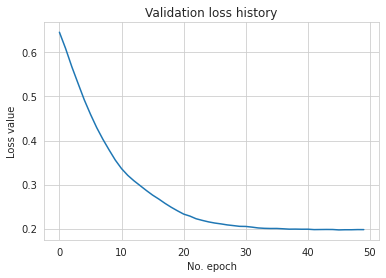

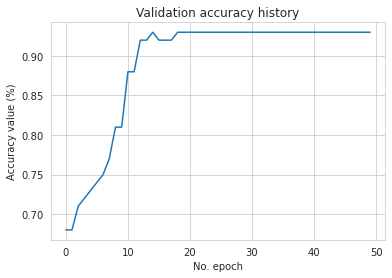

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [107]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.argmax(pred,axis=1)
# Cross-validate
# Use for StratifiedKFold classification
kf = StratifiedKFold(10, shuffle=True, random_state=0) 
R2=[] 
oos_y = []
oos_pred = []
fold = 0

# Must specify y StratifiedKFold for
for train, test in kf.split(X_train,y_train):  
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X_train[train]
    Y_train = y_train[train]
    x_test = X_train[test]
    Y_test = y_train[test]
    
    from tensorflow.keras.callbacks import EarlyStopping
    ann1 = tf.keras.models.Sequential()
    ann1.add(tf.keras.layers.Dense(units=7, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=7, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann1.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)

    history1 = ann1.fit(x_train, Y_train, batch_size = 4, epochs = 50,validation_data=(x_test, Y_test),
          callbacks=[early_stop])
    
    pred = ann1.predict(x_test)
    pred = (pred > 0.5)
    oos_y.append(Y_test)
    # raw probabilities to chosen class (highest probability)

    oos_pred.append(pred)  

    # Measure this fold's accuracy
    from sklearn.metrics import confusion_matrix, accuracy_score

    score = accuracy_score(Y_test, pred)
    print(f"Fold score (accuracy): ",score)
    R2.append(score)


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
from sklearn.metrics import confusion_matrix, accuracy_score

score = accuracy_score(oos_y, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction (from the last neural network)
holdout_pred = ann1.predict(X_test)
holdout_pred = (holdout_pred > 0.5)
r2 = accuracy_score(y_test,holdout_pred)
print(f"Holdout score (Accuracy): {r2}")


Fold #1
Epoch 1/50
68/68 [==============================] - 1s 6ms/step - loss: 0.6430 - accuracy: 0.5852 - val_loss: 0.6281 - val_accuracy: 0.6333
Epoch 2/50
68/68 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.8074 - val_loss: 0.6109 - val_accuracy: 0.7000
Epoch 3/50
68/68 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.8407 - val_loss: 0.5950 - val_accuracy: 0.8000
Epoch 4/50
68/68 [==============================] - 0s 4ms/step - loss: 0.5797 - accuracy: 0.8481 - val_loss: 0.5761 - val_accuracy: 0.8333
Epoch 5/50
68/68 [==============================] - 0s 4ms/step - loss: 0.5548 - accuracy: 0.8481 - val_loss: 0.5498 - val_accuracy: 0.8000
Epoch 6/50
68/68 [==============================] - 0s 4ms/step - loss: 0.5243 - accuracy: 0.8407 - val_loss: 0.5185 - val_accuracy: 0.8000
Epoch 7/50
68/68 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.8481 - val_loss: 0.4825 - val_accuracy: 0.8000
Epoch 8/50
6

Epoch 9/50
68/68 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8481 - val_loss: 0.2790 - val_accuracy: 0.9667
Epoch 10/50
68/68 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8556 - val_loss: 0.2632 - val_accuracy: 0.9667
Epoch 11/50
68/68 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8630 - val_loss: 0.2550 - val_accuracy: 0.9667
Epoch 12/50
68/68 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8630 - val_loss: 0.2440 - val_accuracy: 0.9667
Epoch 13/50
68/68 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8593 - val_loss: 0.2343 - val_accuracy: 0.9667
Epoch 14/50
68/68 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8630 - val_loss: 0.2281 - val_accuracy: 0.9333
Epoch 15/50
68/68 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8667 - val_loss: 0.2206 - val_accuracy: 0.9333
Epoch 16/50
68

Epoch 17/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.9000 - val_loss: 0.2069 - val_accuracy: 0.9333
Epoch 18/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.8926 - val_loss: 0.2052 - val_accuracy: 0.9333
Epoch 19/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.8963 - val_loss: 0.2050 - val_accuracy: 0.9333
Epoch 20/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9074 - val_loss: 0.2067 - val_accuracy: 0.9333
Epoch 21/50
68/68 [==============================] - 0s 5ms/step - loss: 0.2527 - accuracy: 0.9074 - val_loss: 0.2068 - val_accuracy: 0.9333
Epoch 22/50
68/68 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.8963 - val_loss: 0.2036 - val_accuracy: 0.9333
Epoch 23/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.8963 - val_loss: 0.2044 - val_accuracy: 0.9333
Epoch 24/50
6

Epoch 32/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9037 - val_loss: 0.2928 - val_accuracy: 0.8333
Epoch 33/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.9000 - val_loss: 0.2988 - val_accuracy: 0.8333
Epoch 34/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9037 - val_loss: 0.2946 - val_accuracy: 0.9000
Epoch 35/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.9037 - val_loss: 0.2922 - val_accuracy: 0.9000
Epoch 36/50
68/68 [==============================] - 0s 4ms/step - loss: 0.2455 - accuracy: 0.9037 - val_loss: 0.2901 - val_accuracy: 0.9000
Epoch 37/50
68/68 [==============================] - 0s 4ms/step - loss: 0.2454 - accuracy: 0.9074 - val_loss: 0.2923 - val_accuracy: 0.9000
Epoch 38/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2454 - accuracy: 0.9074 - val_loss: 0.2941 - val_accuracy: 0.9000
Epoch 39/50
6

Epoch 46/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.9074 - val_loss: 0.1793 - val_accuracy: 0.9333
Epoch 47/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9037 - val_loss: 0.1681 - val_accuracy: 0.9333
Epoch 48/50
68/68 [==============================] - 0s 5ms/step - loss: 0.2465 - accuracy: 0.9037 - val_loss: 0.1737 - val_accuracy: 0.9333
Epoch 49/50
68/68 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.9037 - val_loss: 0.1753 - val_accuracy: 0.9333
Epoch 50/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.9037 - val_loss: 0.1714 - val_accuracy: 0.9333
Fold score (accuracy):  0.9333333333333333
Fold #8
Epoch 1/50
68/68 [==============================] - 2s 7ms/step - loss: 0.7705 - accuracy: 0.4444 - val_loss: 0.7216 - val_accuracy: 0.5000
Epoch 2/50
68/68 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.6074 - val_

Epoch 30/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.8889 - val_loss: 0.2260 - val_accuracy: 0.9667
Epoch 31/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.8926 - val_loss: 0.2288 - val_accuracy: 0.9667
Epoch 32/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.8852 - val_loss: 0.2288 - val_accuracy: 0.9667
Epoch 33/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.8889 - val_loss: 0.2300 - val_accuracy: 0.9667
Epoch 34/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.8926 - val_loss: 0.2285 - val_accuracy: 0.9667
Epoch 35/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.8926 - val_loss: 0.2285 - val_accuracy: 0.9667
Epoch 36/50
68/68 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.8926 - val_loss: 0.2328 - val_accuracy: 0.9667
Epoch 37/50
6

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, holdout_pred)
print(cm)
accuracy_score(y_test, holdout_pred)

[[64  4]
 [ 3 29]]


0.93

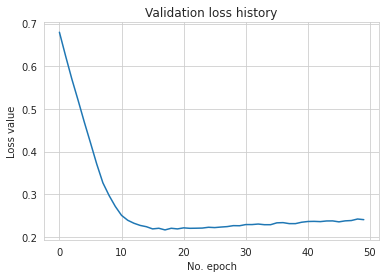

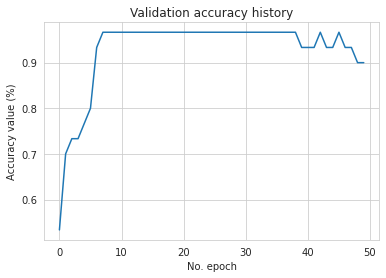

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [110]:
mean=sum(R2)/len(R2)
mean*100


89.33333333333333

In [111]:
variance = sum([((x - mean) ** 2) for x in R2]) / len(R2) 
res = variance ** 0.5
res*100

5.9254629448770615